## Final Project Submission

Please fill out:
* Student name: Charlie Losche
* Student pace: full time
* Scheduled project review date/time: 8/1/2022
* Instructor name: David Elliot
* Blog post URL:N/A


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

Analyze and review the dataframe to better understand its makeup, the columns, datatypes, etc.

In [4]:
pd.set_option('display.max_colwidth', None) #allows us to see the full text of each object column, namely the "address" field
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [5]:
#Confirm the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [6]:
#Look at the 'floors' value counts to determine why its a float
df['floors'].value_counts()

1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

In [7]:
#Identify the number of NAs / Nulls (blank)
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [9]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [10]:
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)
df['sale_year'] = df['sale_year'].astype(np.int64)
print('sale years: \n', df.sale_year.value_counts())
print('build years: \n', df.yr_built.value_counts())
print('reno years: \n', df.yr_renovated.value_counts())

sale years: 
 2021    19293
2022    10862
Name: sale_year, dtype: int64
build years: 
 2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1935      39
1901      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64
reno years: 
 0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64


Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

## Data Cleaning

### Linearity

In [11]:
df_num = df.select_dtypes(include=np.number)

df_num.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sale_year'],
      dtype='object')

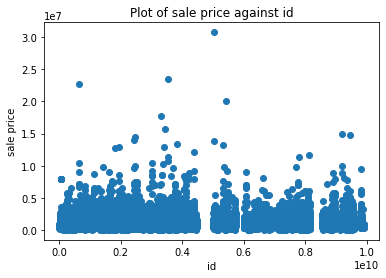

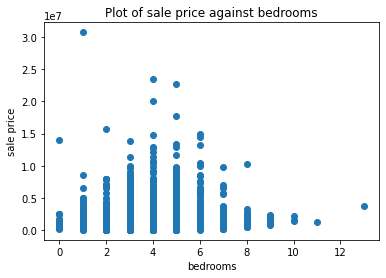

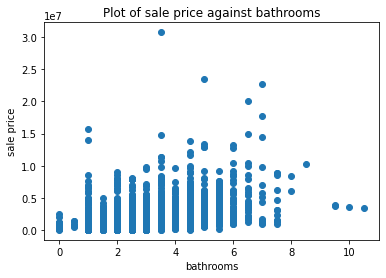

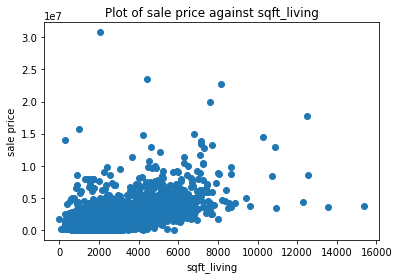

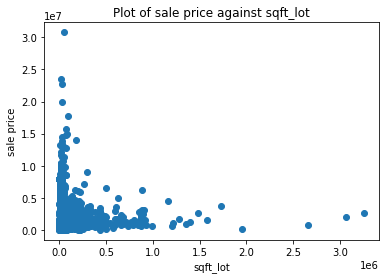

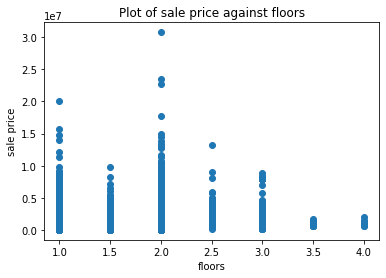

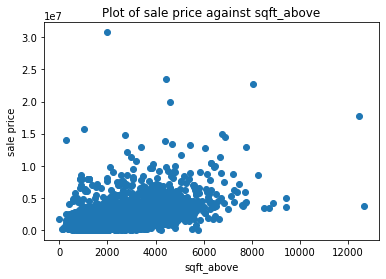

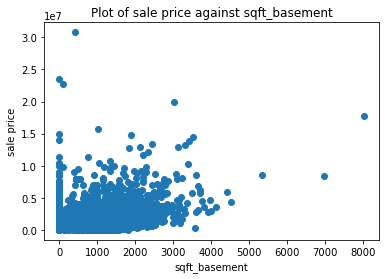

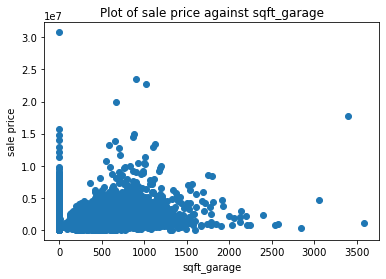

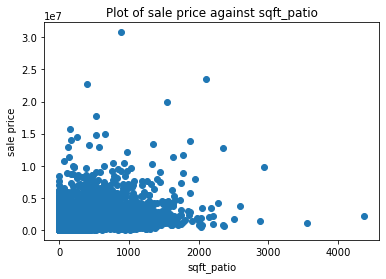

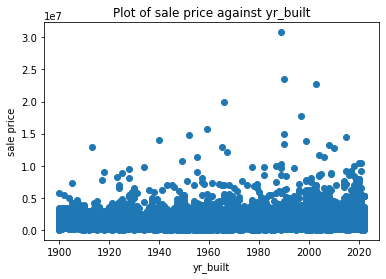

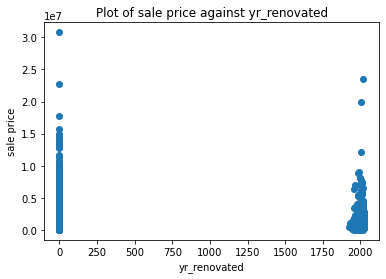

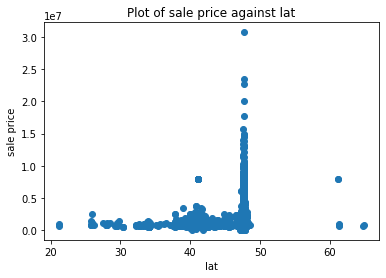

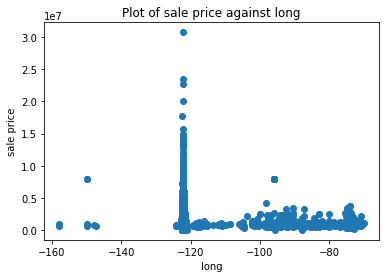

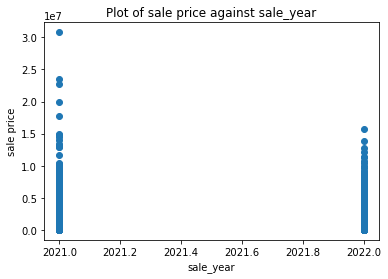

In [12]:
features = df_num.drop(columns='price').columns

for x in features:
    plt.scatter(df[x], df_num['price'])
    plt.title(f'Plot of sale price against {x}')
    plt.xlabel(x)
    plt.ylabel('sale price')
    plt.show()
    


# Nonlinear variables

Nonlinear variables include:
- sale year
- lat/long
- floors - categorical
- bathrooms - categorical
- bedrooms - categorical
- id

## collinearity

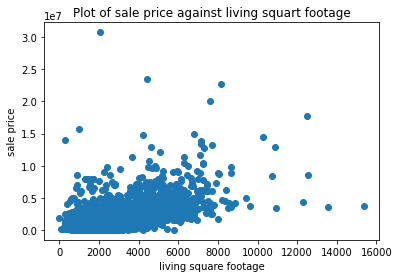

In [16]:
plt.scatter(df['sqft_living'], df_num['price'])
plt.title(f'Plot of sale price against living squart footage')
plt.xlabel('living square footage')
plt.ylabel('sale price')
plt.savefig('Scatter_Price vs Living Sqft.png')
plt.show();

In [13]:
df_predictors = df.drop(columns=['price'])

<AxesSubplot:>

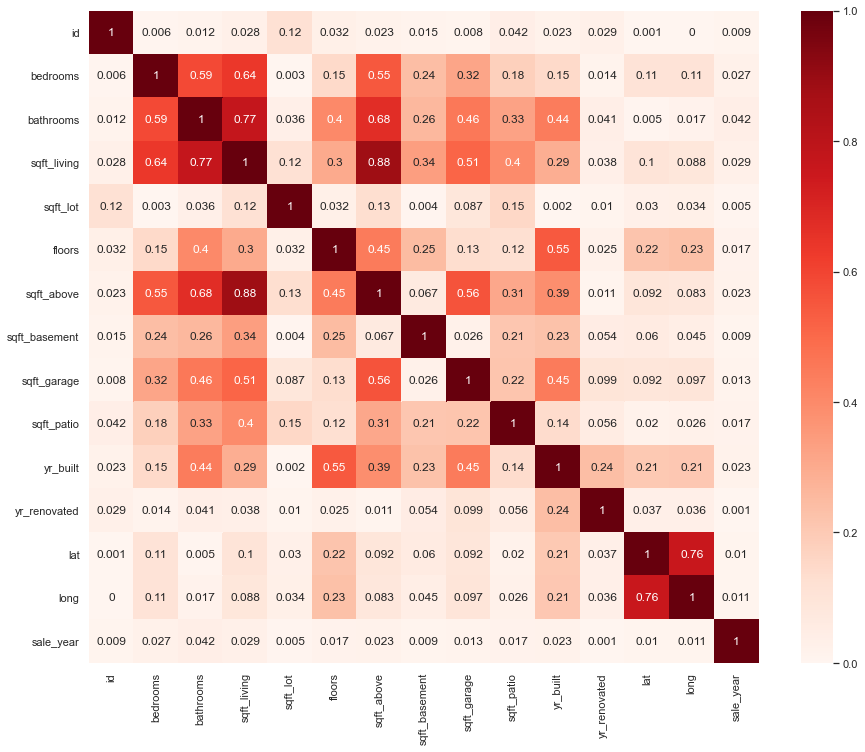

In [141]:
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Reds", annot=True)


It looks like there is high multicolinearity between:
- square footage against types of rooms and sqft of living
- sqft of different rooms against different types of rooms
- generally, anything inloving the space of the house/footage will have high colinearity

### VIF Scores/interpretations

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_num_pred = df_num.drop(columns='price')

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(df_num_pred.values, i) for i in range(len(df_num_pred.columns))]

# label the scores with their related columns
vif["features"] = df_num_pred.columns

vif

,VIF,features
0,3.539395,id
1,1.840332,bedrooms
2,3.284715,bathrooms
3,20.338576,sqft_living
4,1.068062,sqft_lot
5,2.011008,floors
6,17.228110,sqft_above
7,4.038710,sqft_basement
8,1.908084,sqft_garage
9,1.241089,sqft_patio


VIF Score Interpretation:

| Value | Correlation          |
|-------|----------------------|
| 1     | No correlation       |
| 1-5   | Moderate correlation |
| 5+    | High correlation     |

High (5+) correlation variables:

- sqf_living
- sqft_above
- sale_year

### Normality and Residuals

Quick Mutliple Regression to look at residuals

In [19]:
x_baseline = df_num['sqft_living']
y = df_num['price']
baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:11:11   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = df_num_pred
y = df_num['price']

model = sm.OLS(y, sm.add_constant(X))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1474.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:22   Log-Likelihood:            -4.4780e+05
No. Observations:               30155   AIC:                         8.956e+05
Df Residuals:                   30139   BIC:                         8.958e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.373e+08   1.65e+07    -20.398      0.000    -3.7e+08   -3.05e+08
id            -2.833e-06   1.37e-06     -2.064      0.039   -5.52e-06   -1.43e-07
bedrooms      -1.663e+05   5419.852    -30.679      0.000   -1.77e+05   -1.56e+05
bathrooms      1.413e+05   7991.043     17.680      0.000    1.26e+05    1.57e+05
sqft_living     335.1074     18.157     18.456      0.000     299.519     370.696
sqft_lot         -0.0931      0.067     -1.387      0.165      -0.225       0.038
floors        -8512.1431   9796.213     -0.869      0.385   -2.77e+04    1.07e+04
sqft_above      289.0114     18.533     15.595      0.000     252.687     325.336
sqft_basement   163.3963     13.597     12.017      0.000     136.746     190.046
sqft_garage    -146.7386     18.958     -7.740      0.000    -183.897    -109.580
sqft_patio      265.1725     17.810     14.889      0.000     230.264     300.081
yr_built      -3203.5825    185.558    -17.265      0.000   -3567.285   -2839.880
yr_renovated     50.5110      9.943      5.080      0.000      31.023      69.999
lat            3.169e+04   4251.342      7.454      0.000    2.34e+04       4e+04
long           1.173e+04   1068.974     10.972      0.000    9633.350    1.38e+04
sale_year        1.7e+05   8177.745     20.787      0.000    1.54e+05    1.86e+05
==============================================================================
Omnibus:                    43623.487   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51640396.142
Skew:                           8.229   Prob(JB):                         0.00
Kurtosis:                     205.062   Cond. No.                     2.27e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
results.resid

0        308089.127914
1       -340268.280981
2       -687715.839841
3       -258853.936680
4         98024.434147
             ...      
30150    633970.782658
30151    278544.856685
30152     -5141.097736
30153   -576212.370911
30154    -47988.471348
Length: 30155, dtype: float64

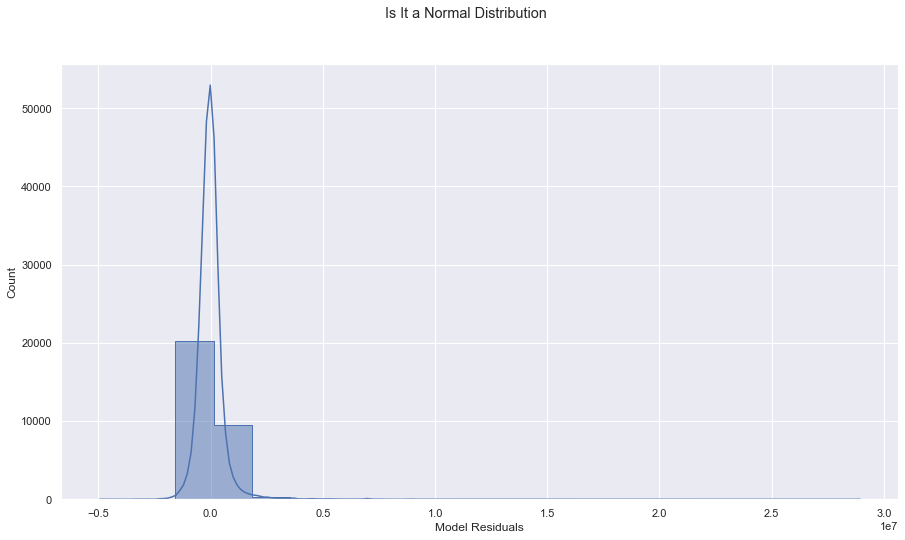

In [18]:
fig, ax = plt.subplots()
sns.histplot(results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

### Perfect QQ vs Our Multiple Regression QQ Plot

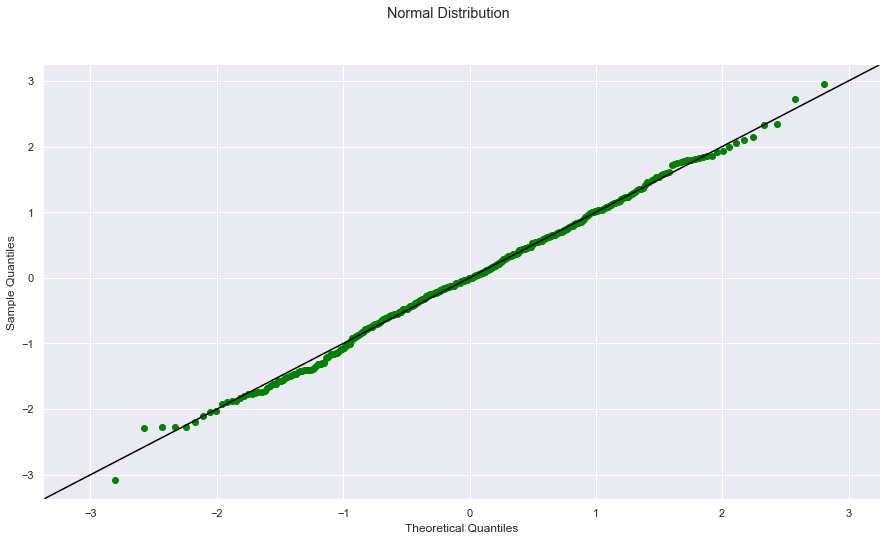

In [19]:
#Perfectly normal
generated_data = stats.norm.rvs(size=400, random_state=7)
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(generated_data, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

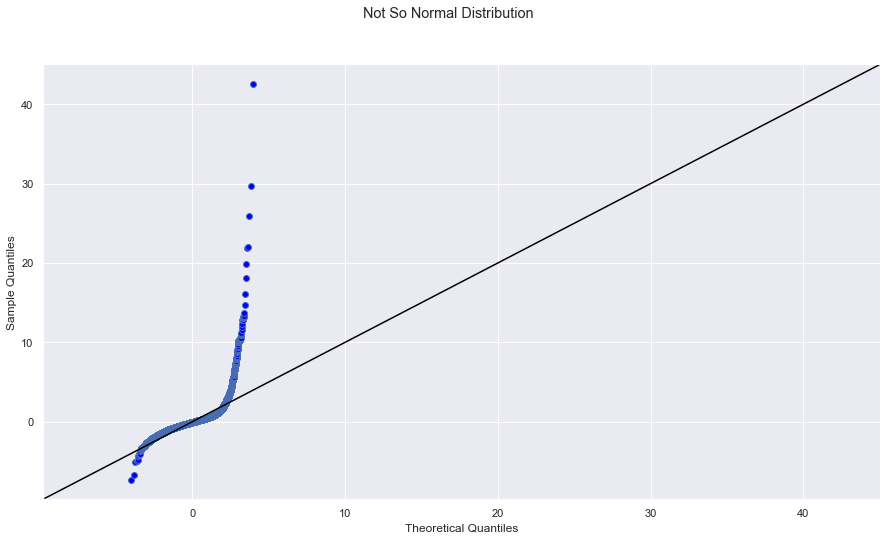

In [20]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

### Heteroskedasticity

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [22]:
het_breuschpagan(results.resid, sm.add_constant(X))

(596.6722573730785,
 1.808234082214936e-117,
 40.55959078955443,
 1.0633992158463925e-118)

The Breusch-Pagan Test P value is  1.0633992213478174e-118 - so we reject the null that the dataset is homoskedastic - the data is heteroskedastic

In [23]:
results.params

const           -3.373134e+08
id              -2.832541e-06
bedrooms        -1.662758e+05
bathrooms        1.412846e+05
sqft_living      3.351074e+02
sqft_lot        -9.311288e-02
floors          -8.512143e+03
sqft_above       2.890114e+02
sqft_basement    1.633963e+02
sqft_garage     -1.467386e+02
sqft_patio       2.651725e+02
yr_built        -3.203583e+03
yr_renovated     5.051105e+01
lat              3.168948e+04
long             1.172858e+04
sale_year        1.699921e+05
dtype: float64

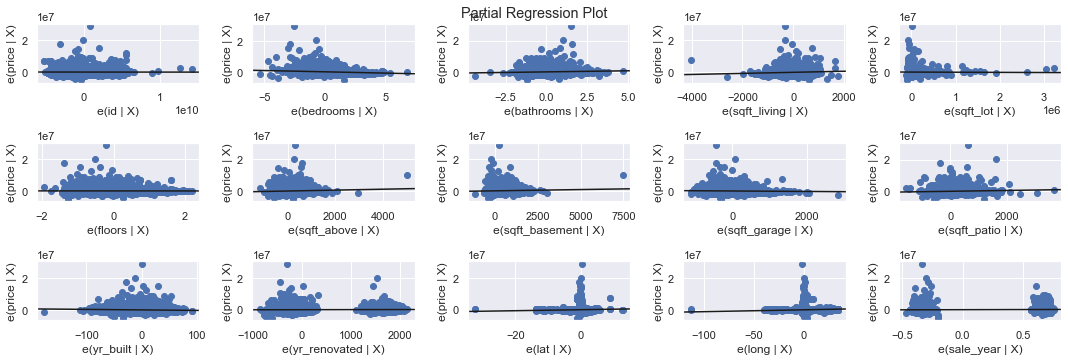

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(5,5),
    fig=fig)
plt.show()

In [25]:
y_log = np.log(y)

# Data Cleaning - variables 9-13

my variables to turn into categorical

-  `waterfront` - BINARY
* `greenbelt` - BINARY
* `nuisance` - BINARY
* `view` - ORDINAL
* `condition` - ORDINAL



In [26]:
print(df.waterfront.value_counts(), ' \n')
print(df.greenbelt.value_counts(), ' \n')
print(df.nuisance.value_counts(), ' \n')
print(df.view.value_counts(), ' \n')
print(df.condition.value_counts(), ' \n')

NO     29636
YES      519
Name: waterfront, dtype: int64  

NO     29382
YES      773
Name: greenbelt, dtype: int64  

NO     24893
YES     5262
Name: nuisance, dtype: int64  

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64  

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64  



binary variables first

In [27]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
greenbelt_cat = df[['greenbelt']]

# (2) Instantiate an OrdinalEncoder
encoder_greenbelt = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_greenbelt.fit(greenbelt_cat)

# Inspect the categories of the fitted encoder
encoder_greenbelt.categories_[0]

array(['NO', 'YES'], dtype=object)

No Greenbelt: 0
Yes Greenbelt: 1

In [28]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)

# Flatten for appropriate shape
greenbelt_encoded_train = greenbelt_encoded_train.flatten()

# Visually inspect variable
greenbelt_encoded_train

# (5) Replace value of greenbelt
df["greenbelt"] = greenbelt_encoded_train

# Visually inspect
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_year
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,0.0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052,2022
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,0.0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591,2021
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,0.0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520,2021
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,0.0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020,2021
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,0.0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188,2021


In [29]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
nuisance_cat = df[['nuisance']]

# (2) Instantiate an OrdinalEncoder
encoder_nuisance = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_nuisance.fit(nuisance_cat)

# Inspect the categories of the fitted encoder
encoder_nuisance.categories_[0]


array(['NO', 'YES'], dtype=object)

Nuisance NO: 0
Nuisance YES: 1

In [30]:

# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)

# Flatten for appropriate shape
nuisance_encoded_train = nuisance_encoded_train.flatten()

# (5) Replace value of greenbelt
df["nuisance"] = nuisance_encoded_train

# Visually inspect
df.nuisance.value_counts()

0.0    24893
1.0     5262
Name: nuisance, dtype: int64

Now for the ranked (ordinal) variables - view and condition

In [31]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
condition_cat = df[['condition']]

#set the condition categories
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
# (2) Instantiate an OrdinalEncoder
encoder_condition = OrdinalEncoder(categories=[condition_categories])

# (3) Fit the encoder on variable
encoder_condition.fit(condition_cat)

# Inspect the categories of the fitted encoder
encoder_condition.categories_[0]

array(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], dtype=object)

- 'Poor': 0
- 'Fair': 1
- 'Average': 2
- 'Good': 3
- 'Very Good': 4

In [32]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
condition_encoded_train = encoder_condition.transform(condition_cat)

# Flatten for appropriate shape
condition_encoded_train = condition_encoded_train.flatten()

# (5) Replace value of greenbelt
df["condition"] = condition_encoded_train

# Visually inspect
df.condition.value_counts()

2.0    18547
3.0     8054
4.0     3259
1.0      230
0.0       65
Name: condition, dtype: int64

In [33]:
df.view.value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [34]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
view_cat = df[['view']]

#set the condition categories
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
# (2) Instantiate an OrdinalEncoder
encoder_view = OrdinalEncoder(categories=[view_categories])

# (3) Fit the encoder on variable
encoder_view.fit(view_cat)

# Inspect the categories of the fitted encoder
encoder_view.categories_[0]

array(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], dtype=object)

- 'NONE': 0
- 'FAIR': 1
- 'AVERAGE': 2
- 'GOOD': 3
- 'EXCELLENT': 4

In [35]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
view_encoded_train = encoder_view.transform(view_cat)

# Flatten for appropriate shape
view_encoded_train = view_encoded_train.flatten()

# (5) Replace value of greenbelt
df["view"] = view_encoded_train

# Visually inspect
df.view.value_counts()

0.0    26589
2.0     1915
3.0      878
4.0      553
1.0      220
Name: view, dtype: int64

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_year
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,0.0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052,2022
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,0.0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591,2021
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,0.0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520,2021
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,0.0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020,2021
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,0.0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188,2021


### Messing Around - weights of the variables

In [37]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

In [38]:
results_standardized = sm.OLS(y, sm.add_constant(X_standard)).fit()

In [39]:
weights = results_standardized.params
weights

const            1.108536e+06
id              -8.165048e+03
bedrooms        -1.632184e+05
bathrooms        1.256806e+05
sqft_living      3.264095e+05
sqft_lot        -5.622398e+03
floors          -4.832488e+03
sqft_above       2.538405e+05
sqft_basement    9.470959e+04
sqft_garage     -4.193358e+04
sqft_patio       6.504756e+04
yr_built        -1.027304e+05
yr_renovated     2.103649e+04
lat              4.544287e+04
long             6.715172e+04
sale_year        8.160777e+04
dtype: float64

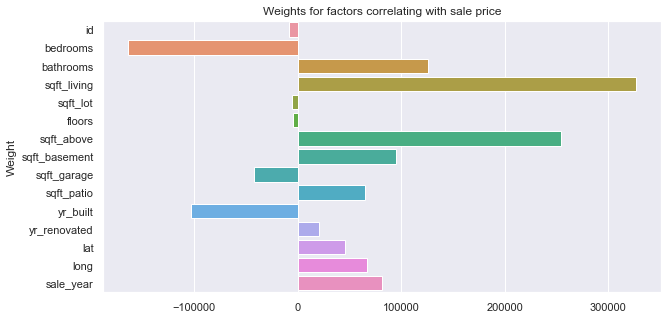

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with sale price")
plt.ylabel('Weight')
plt.show()

In [41]:
results_standardized.rsquared

0.42315156423625266

In [42]:
results.rsquared_adj

0.42286447022064433

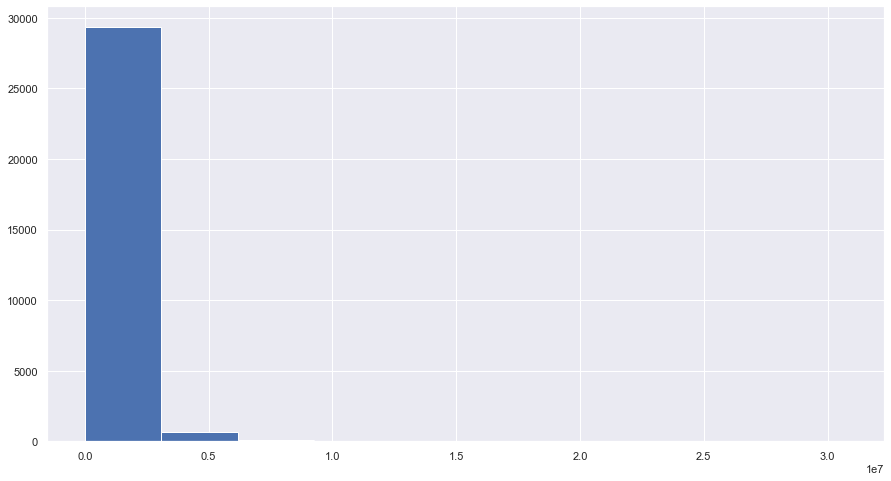

In [43]:
y.hist();

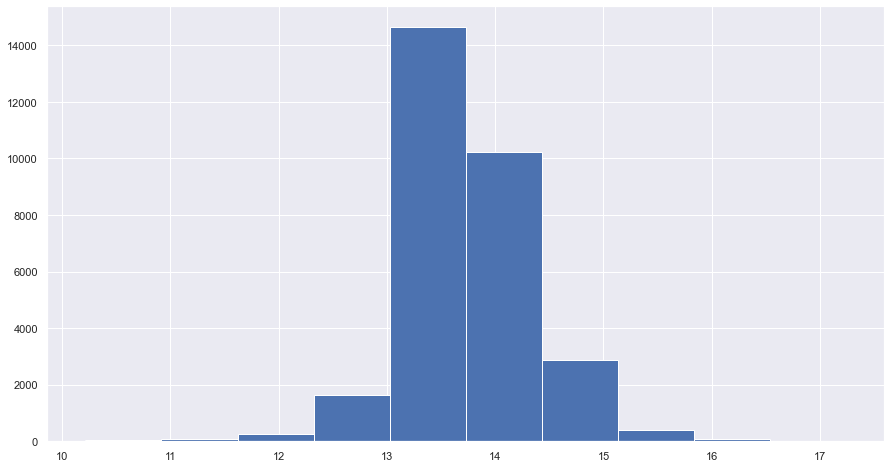

In [44]:
y_scld = np.log(y)
y_scld.hist();

In [45]:
model_diam = sm.OLS(y_scld, sm.add_constant(X_standard)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:27   Log-Likelihood:                -17899.
No. Observations:               30155   AIC:                         3.583e+04
Df Residuals:                   30139   BIC:                         3.596e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7348      0.003   5443.046      0.000      13.730      13.740
id               -0.0012      0.003     -0.453      0.651      -0.006       0.004
bedrooms         -0.0582      0.003    -16.992      0.000      -0.065      -0.051
bathrooms         0.0922      0.005     20.148      0.000       0.083       0.101
sqft_living       0.2102      0.011     18.470      0.000       0.188       0.233
sqft_lot          0.0033      0.003      1.262      0.207      -0.002       0.008
floors            0.0488      0.004     13.643      0.000       0.042       0.056
sqft_above        0.1066      0.010     10.175      0.000       0.086       0.127
sqft_basement     0.0576      0.005     11.361      0.000       0.048       0.068
sqft_garage      -0.0034      0.003     -0.964      0.335      -0.010       0.003
sqft_patio        0.0375      0.003     13.354      0.000       0.032       0.043
yr_built         -0.0788      0.004    -20.579      0.000      -0.086      -0.071
yr_renovated      0.0092      0.003      3.436      0.001       0.004       0.014
lat               0.0520      0.004     13.263      0.000       0.044       0.060
long              0.0558      0.004     14.157      0.000       0.048       0.063
sale_year         0.0663      0.003     26.233      0.000       0.061       0.071
==============================================================================
Omnibus:                     7307.192   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71203.469
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                      10.316   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

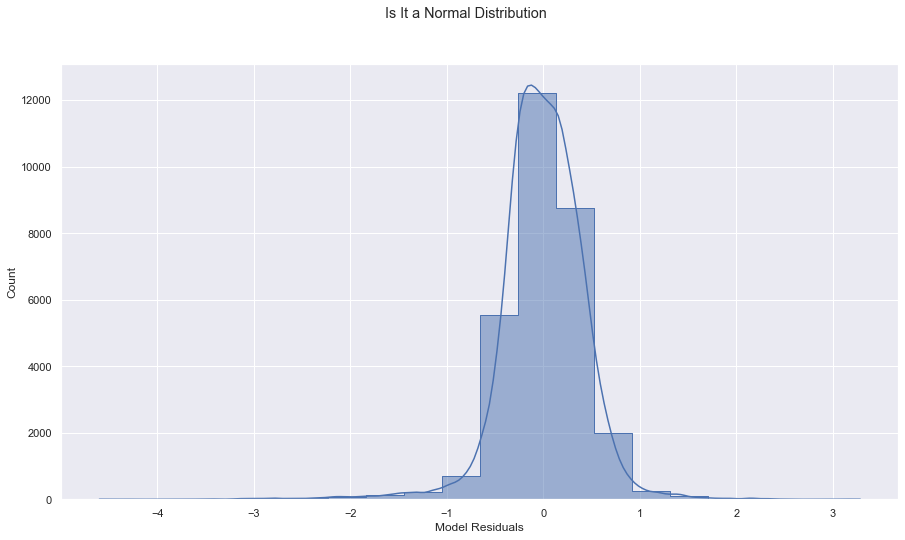

In [46]:
fig, ax = plt.subplots()
sns.histplot(model_diam.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

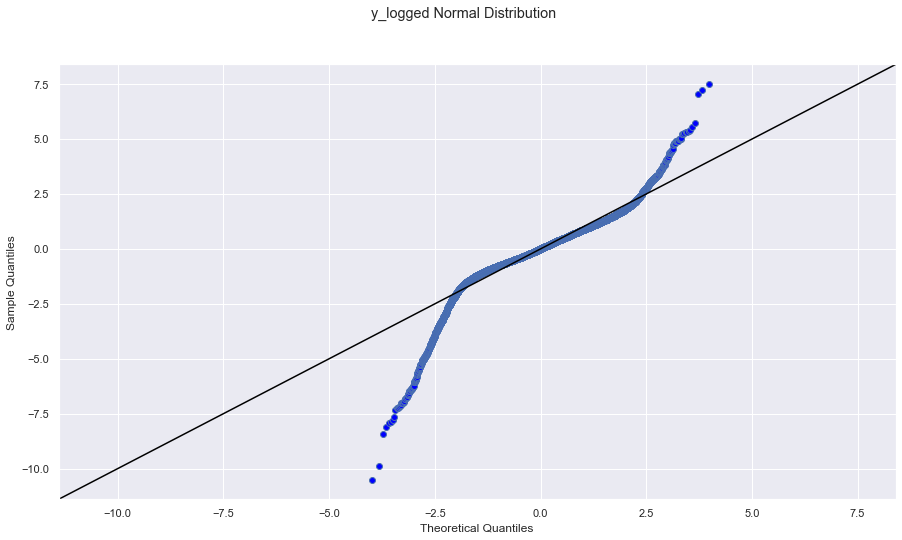

In [47]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(model_diam.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("y_logged Normal Distribution");

In [48]:
print(f"""
A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.2102), 3)},
or {round(np.exp(0.0319) - 1, 3)}%.
""")


A one-unit increase in the depth variable corresponds
to an increase in price by a factor of 1.234,
or 0.032%.



In [49]:
het_breuschpagan(model_diam.resid, sm.add_constant(X_standard))

(447.2990355304889,
 7.639365971154634e-86,
 30.252864171430197,
 1.6084809645109793e-86)

# ALI AND MITCH - Evaluating cleaned model

In [50]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

In [51]:
# Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom). Change 0 bathroom to 1 bathroom. Round up other values.
df.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
df['bathrooms'] = df['bathrooms'].apply(np.ceil)

# Drop unnecessary columns
df.drop(['id', 'floors', 'grade',
         'heat_source','lat','long'], axis=1, inplace=True)

# Create binary substitutes for columns
df['basement_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_basement']]
df['garage_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]
df['patio_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]
df['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in df['waterfront']]
df['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in df['sewer_system']]
df['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in df['yr_renovated']]

# Create zip from address
df['zip'] = [x.split(',')[2][-5:] for x in df['address']] 

# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = df[['greenbelt']]
encoder_greenbelt = OrdinalEncoder(categories=[['NO', 'YES']])
encoder_greenbelt.fit(greenbelt_cat)
encoder_greenbelt.categories_[0]
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
df["greenbelt"] = greenbelt_encoded_train

nuisance_cat = df[['nuisance']]
encoder_nuisance = OrdinalEncoder()
encoder_nuisance.fit(nuisance_cat)
encoder_nuisance.categories_[0]
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
df["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = df[['condition']]
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
encoder_condition = OrdinalEncoder(categories=[condition_categories])
encoder_condition.fit(condition_cat)
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
df["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = df[['view']]
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
encoder_view = OrdinalEncoder(categories=[view_categories])
encoder_view.fit(view_cat)
encoder_view.categories_[0]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
df["view"] = view_encoded_train

#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df = df[df.zip.str.startswith(('98'))]

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = df[["zip"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
                    sparse=False,
                    handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(fireplace_qu_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98047', '98050', '98051', '98052', '98053', '98055', '98056',
        '98057', '98058', '98059', '98065', '98070', '98072', '98074',
        '98075', '98077', '98092', '98102', '98103', '98105', '98106',
        '98107', '98108', '98109', '98112', '98115', '98116', '98117',
        '98118', '98119', '98122', '98125', '98126', '98133', '98136',
        '98144', '98146', '98148', '98155', '98166', '98168', '98177',
        '98178', '98188', '98198', '98199', '98223', '98224', '98251',
        '98270', '98271', '98272', '98288', '98296', '98338', '98354',
        '98372', '98387', '98422', '98663'], dtype=object)]

In [52]:
encoder_greenbelt.categories_[0]

array(['NO', 'YES'], dtype=object)

In [53]:
# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# Visually inspect fireplace_qu_encoded_train
fireplace_qu_encoded_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# Run this cell without changes

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=df.index
)

# Visually inspect new dataframe
fireplace_qu_encoded_train

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Run this cell without changes

# (5b) Drop original FireplaceQu column
df.drop("zip", axis=1, inplace=True)

# Visually inspect X_train

In [56]:
# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
df = pd.concat([df, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_train
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
0,2022-05-24,675000.0,4,1.0,1180,7140,NO,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-13,920000.0,5,3.0,2770,6703,NO,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,311000.0,6,2.0,2880,6156,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-14,775000.0,3,3.0,2160,1400,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-08-24,592500.0,2,2.0,1120,758,NO,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X = df.drop(columns=['price', 'sewer_system', 'waterfront','address','sqft_patio', 'sqft_basement', 'sqft_garage','bedrooms', 'bathrooms','PublicSewer_binary','garage_binary', 'date'])
y = df['price']

In [58]:
results_full = sm.OLS(y, sm.add_constant(X)).fit()

In [59]:
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     529.3
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:29   Log-Likelihood:            -4.2704e+05
No. Observations:               29237   AIC:                         8.543e+05
Df Residuals:                   29136   BIC:                         8.551e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.983e+05   2.62e+05     -1.137      0.255   -8.12e+05    2.16e+05
sqft_living         285.7128     10.155     28.135      0.000     265.808     305.617
sqft_lot              0.6130      0.054     11.286      0.000       0.507       0.719
greenbelt           5.49e+04   2.04e+04      2.694      0.007     1.5e+04    9.48e+04
nuisance          -5.137e+04   8590.389     -5.979      0.000   -6.82e+04   -3.45e+04
view               1.227e+05   4358.422     28.145      0.000    1.14e+05    1.31e+05
condition          5.486e+04   4933.369     11.121      0.000    4.52e+04    6.45e+04
sqft_above          184.7368     11.441     16.147      0.000     162.313     207.161
yr_built            163.4021    132.862      1.230      0.219     -97.013     423.817
yr_renovated       7182.1334    812.281      8.842      0.000    5590.025    8774.242
basement_binary   -9973.2011      1e+04     -0.994      0.320   -2.96e+04    9684.143
patio_binary      -2.967e+04   7969.325     -3.723      0.000   -4.53e+04    -1.4e+04
waterfront_binary  1.008e+06   2.69e+04     37.503      0.000    9.55e+05    1.06e+06
yrenovated_binary -1.427e+07   1.62e+06     -8.792      0.000   -1.75e+07   -1.11e+07
98001             -4.939e+05   2.68e+04    -18.413      0.000   -5.46e+05   -4.41e+05
98002              -4.12e+05   3.22e+04    -12.783      0.000   -4.75e+05   -3.49e+05
98003             -4.368e+05      3e+04    -14.547      0.000   -4.96e+05   -3.78e+05
98004              1.925e+06   3.39e+04     56.752      0.000    1.86e+06    1.99e+06
98005              7.168e+05   4.27e+04     16.777      0.000    6.33e+05       8e+05
98006              3.834e+05   2.85e+04     13.449      0.000    3.28e+05    4.39e+05
98007              2.859e+05   4.56e+04      6.272      0.000    1.97e+05    3.75e+05
98008              3.381e+05   3.11e+04     10.863      0.000    2.77e+05    3.99e+05
98010                 -6e+05   3.44e+04    -17.448      0.000   -6.67e+05   -5.33e+05
98011             -1.063e+04   3.65e+04     -0.291      0.771   -8.22e+04     6.1e+04
98014             -3.418e+05   4.54e+04     -7.525      0.000   -4.31e+05   -2.53e+05
98019             -2.664e+05   3.77e+04     -7.062      0.000    -3.4e+05   -1.92e+05
98022             -5.361e+05   2.99e+04    -17.909      0.000   -5.95e+05   -4.77e+05
98023              -4.93e+05   2.59e+04    -19.011      0.000   -5.44e+05   -4.42e+05
98024              8.475e+04   5.24e+04      1.617      0.106    -1.8e+04    1.87e+05
98027              1.978e+04   3.18e+04      0.622      0.534   -4.26e+04    8.21e+04
98028             -8.422e+04   3.27e+04     -2.579      0.010   -1.48e+05   -2.02e+04
98029              2.292e+05    3.4e+04      6.742      0.000    1.63e+05    2.96e+05
98030              -4.57e+05   3.19e+04    -14.327      0.000    -5.2e+05

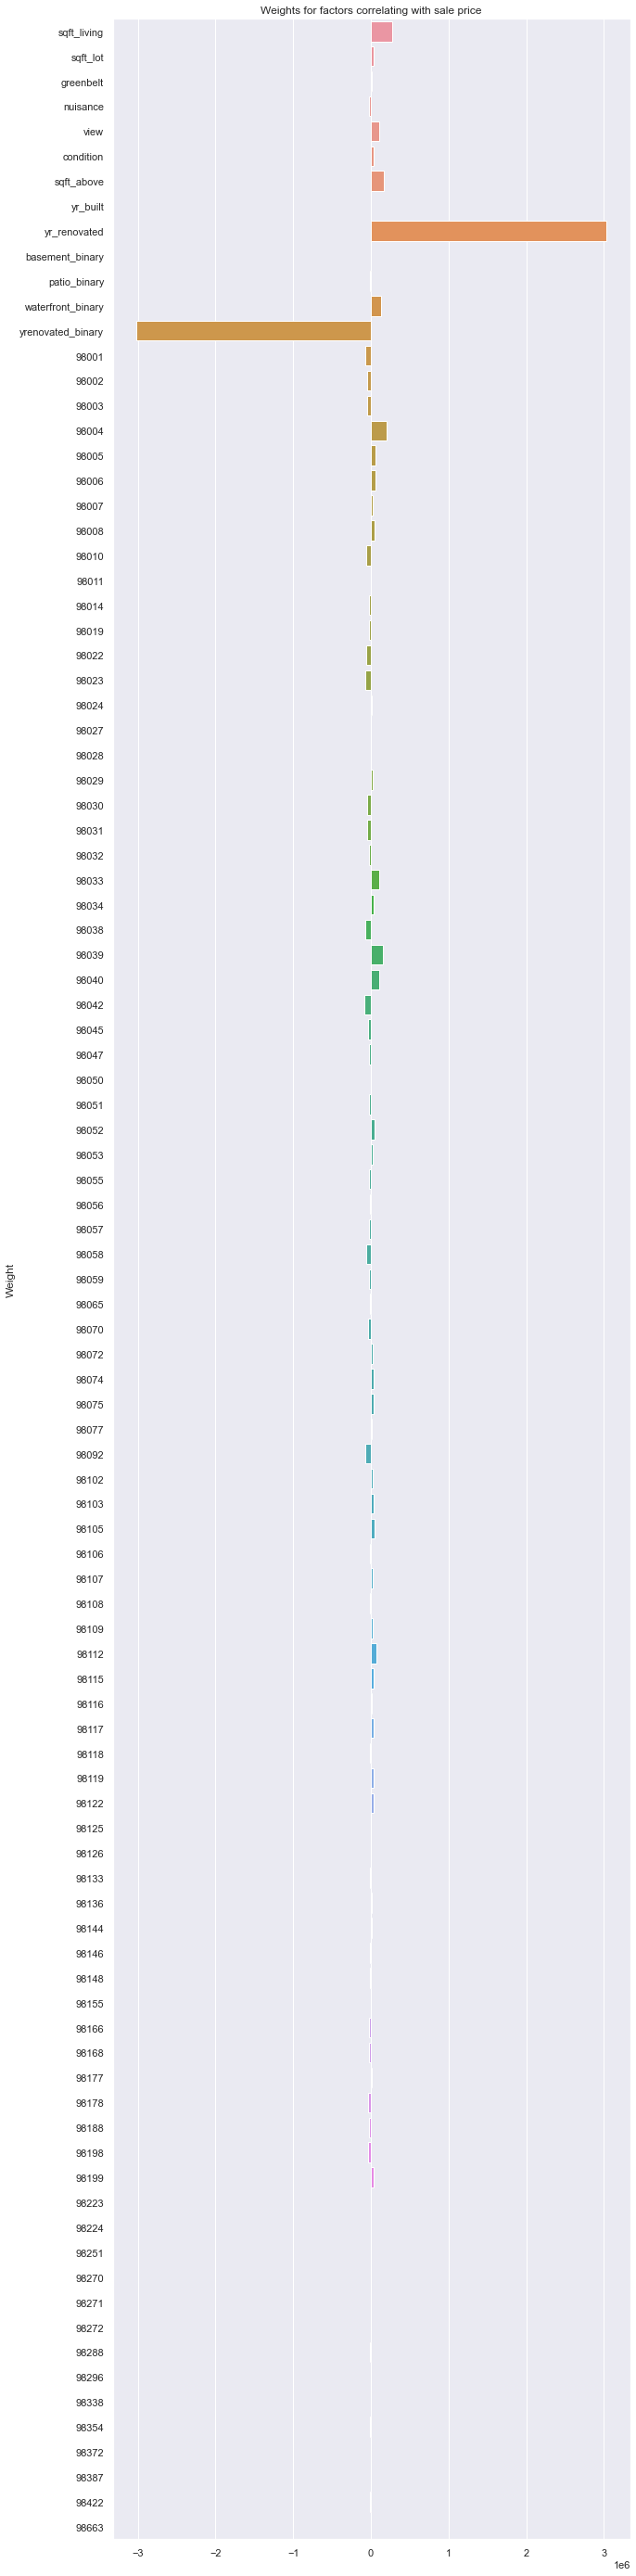

In [60]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

results_standardized = sm.OLS(y, sm.add_constant(X_standard)).fit()

weights = results_standardized.params
weights

plt.figure(figsize=(10,50))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with sale price")
plt.ylabel('Weight')
plt.show()

In [61]:
X_test = df.drop(columns=['sewer_system', 'waterfront','address','sqft_patio', 'sqft_basement', 'sqft_garage','bedrooms', 'bathrooms','PublicSewer_binary','garage_binary'])
X_test.corr()['price'].map(abs).sort_values(ascending=False)

price          1.000000
sqft_living    0.616664
sqft_above     0.546164
view           0.320877
98004          0.305704
                 ...   
98272          0.003046
98296          0.002695
98372          0.001895
98116          0.001625
98271          0.000173
Name: price, Length: 102, dtype: float64

In [62]:
X = df[['sqft_living', 'view', 'waterfront_binary', 'yr_renovated', 'greenbelt', 'condition']]
y = df['price']

In [63]:
results_test = sm.OLS(y, sm.add_constant(X)).fit()

results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     3677.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:31   Log-Likelihood:            -4.3396e+05
No. Observations:               29237   AIC:                         8.679e+05
Df Residuals:                   29230   BIC:                         8.680e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.637e+05   1.75e+04     -9.363      0.000   -1.98e+05   -1.29e+05
sqft_living         528.4180      4.211    125.497      0.000     520.165     536.671
view                1.23e+05   5221.380     23.554      0.000    1.13e+05    1.33e+05
waterfront_binary  9.347e+05   3.32e+04     28.117      0.000     8.7e+05       1e+06
yr_renovated         87.8777      9.467      9.283      0.000      69.323     106.433
greenbelt          5.159e+04   2.49e+04      2.073      0.038    2808.147       1e+05
condition          3.505e+04   5624.677      6.232      0.000     2.4e+04    4.61e+04
==============================================================================
Omnibus:                    40454.874   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44271670.607
Skew:                           7.522   Prob(JB):                         0.00
Kurtosis:                     193.040   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X = df[['sqft_living', 'view', 'waterfront_binary', 'yr_renovated', 'greenbelt', 'condition']]
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())
y = df['price']

results_test = sm.OLS(y, sm.add_constant(X_standard)).fit()

results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     3677.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:31   Log-Likelihood:            -4.3396e+05
No. Observations:               29237   AIC:                         8.679e+05
Df Residuals:                   29230   BIC:                         8.680e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.113e+06   3953.578    281.420      0.000     1.1e+06    1.12e+06
sqft_living        5.165e+05   4115.294    125.497      0.000    5.08e+05    5.25e+05
view               1.062e+05   4506.753     23.554      0.000    9.73e+04    1.15e+05
waterfront_binary  1.231e+05   4377.287     28.117      0.000    1.14e+05    1.32e+05
yr_renovated       3.714e+04   4001.007      9.283      0.000    2.93e+04     4.5e+04
greenbelt          8262.2450   3985.907      2.073      0.038     449.687    1.61e+04
condition          2.482e+04   3983.434      6.232      0.000     1.7e+04    3.26e+04
==============================================================================
Omnibus:                    40454.874   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44271670.607
Skew:                           7.522   Prob(JB):                         0.00
Kurtosis:                     193.040   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
filter1 = df['yr_renovated'] > 0

filter1

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: yr_renovated, Length: 29237, dtype: bool

In [66]:
df['yr_reno_cleaned'] = df['yr_renovated'].loc[filter1]

df.yr_reno_cleaned.value_counts()

2021.0    69
2006.0    49
2018.0    44
1990.0    42
2007.0    41
          ..
1930.0     1
1951.0     1
1924.0     1
1972.0     1
1946.0     1
Name: yr_reno_cleaned, Length: 82, dtype: int64

In [67]:
from sklearn.impute import SimpleImputer

# (1) frontage_train was created previously, so we don't
# need to extract the relevant data again
frontage_train = df[['yr_reno_cleaned']]
# (2) Instantiate a SimpleImputer with strategy="median"
imputer = SimpleImputer(strategy="median")

# (3) Fit the imputer on frontage_train
imputer.fit(frontage_train)

# (4) Transform frontage_train using the imputer and
# assign the result to frontage_imputed_train
frontage_imputed_train = imputer.transform(frontage_train)

# Visually inspect frontage_imputed_train
frontage_imputed_train

array([[2002.],
       [2002.],
       [2002.],
       ...,
       [2002.],
       [2002.],
       [2002.]])

In [68]:
df['yr_reno_cleaned'] = frontage_imputed_train

# Visually inspect X_train
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,...,98272,98288,98296,98338,98354,98372,98387,98422,98663,yr_reno_cleaned
0,2022-05-24,675000.0,4,1.0,1180,7140,NO,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
1,2021-12-13,920000.0,5,3.0,2770,6703,NO,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
2,2021-09-29,311000.0,6,2.0,2880,6156,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
3,2021-12-14,775000.0,3,3.0,2160,1400,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
4,2021-08-24,592500.0,2,2.0,1120,758,NO,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0


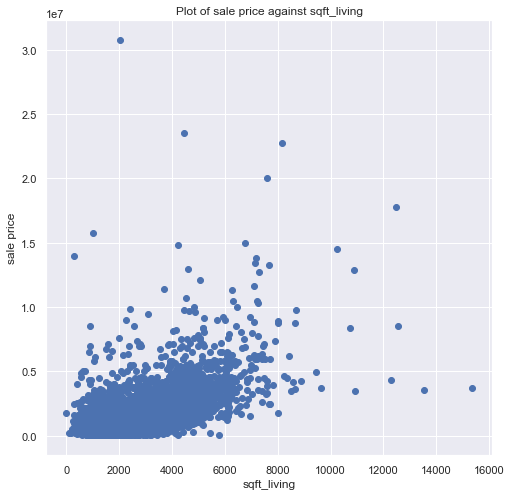

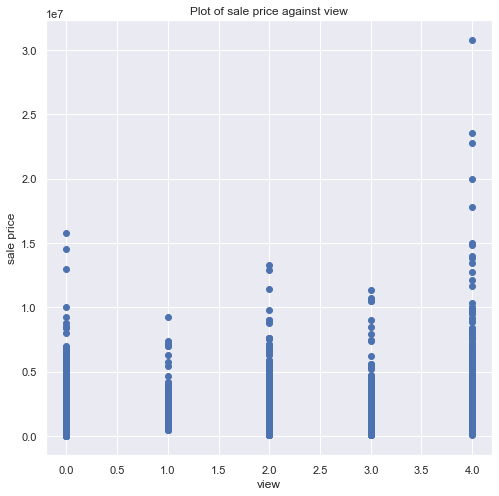

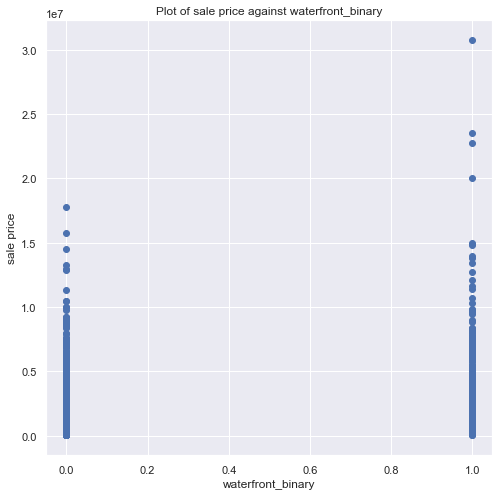

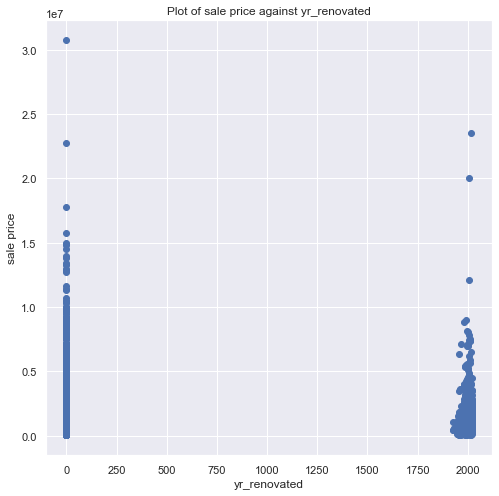

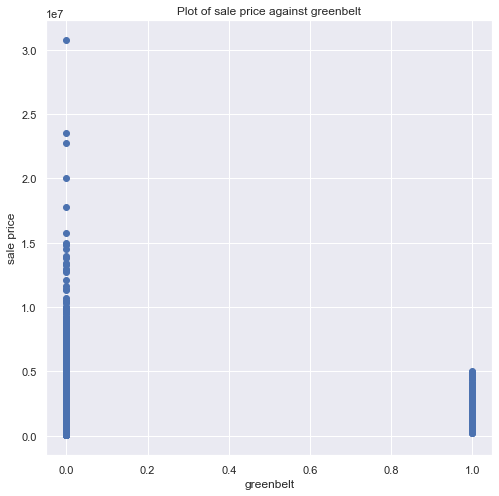

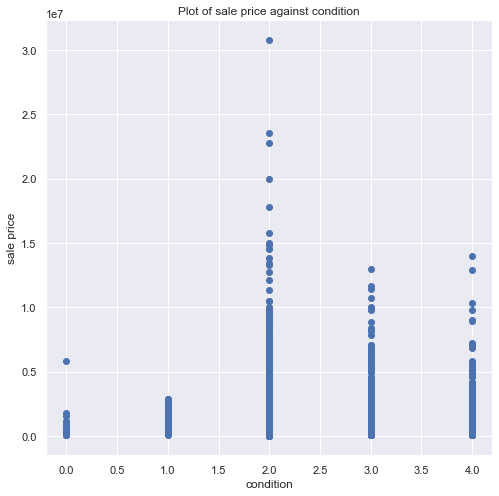

In [69]:
features = X.columns



for x in features:
    plt.figure(figsize=(8,8))
    plt.scatter(X[x], df['price'])
    plt.title(f'Plot of sale price against {x}')
    plt.xlabel(x)
    plt.ylabel('sale price')
    plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['sqft_living', 'view', 'waterfront_binary', 'yr_reno_cleaned', 'condition']]
y = df['price']

In [71]:

results_poly = sm.OLS(y, sm.add_constant(X)).fit()

results_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     4389.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:32   Log-Likelihood:            -4.3399e+05
No. Observations:               29237   AIC:                         8.680e+05
Df Residuals:                   29231   BIC:                         8.680e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.002e+07   2.01e+06     -4.987      0.000    -1.4e+07   -6.08e+06
sqft_living         529.1388      4.187    126.374      0.000     520.932     537.346
view                1.27e+05   5213.059     24.370      0.000    1.17e+05    1.37e+05
waterfront_binary  9.586e+05   3.33e+04     28.822      0.000    8.93e+05    1.02e+06
yr_reno_cleaned    4931.2896   1003.339      4.915      0.000    2964.701    6897.879
condition           3.12e+04   5611.062      5.561      0.000    2.02e+04    4.22e+04
==============================================================================
Omnibus:                    40340.570   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43565444.658
Skew:                           7.483   Prob(JB):                         0.00
Kurtosis:                     191.515   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X_all = df[['price', 'sqft_living', 'view', 'waterfront_binary', 'yr_reno_cleaned', 'condition']]

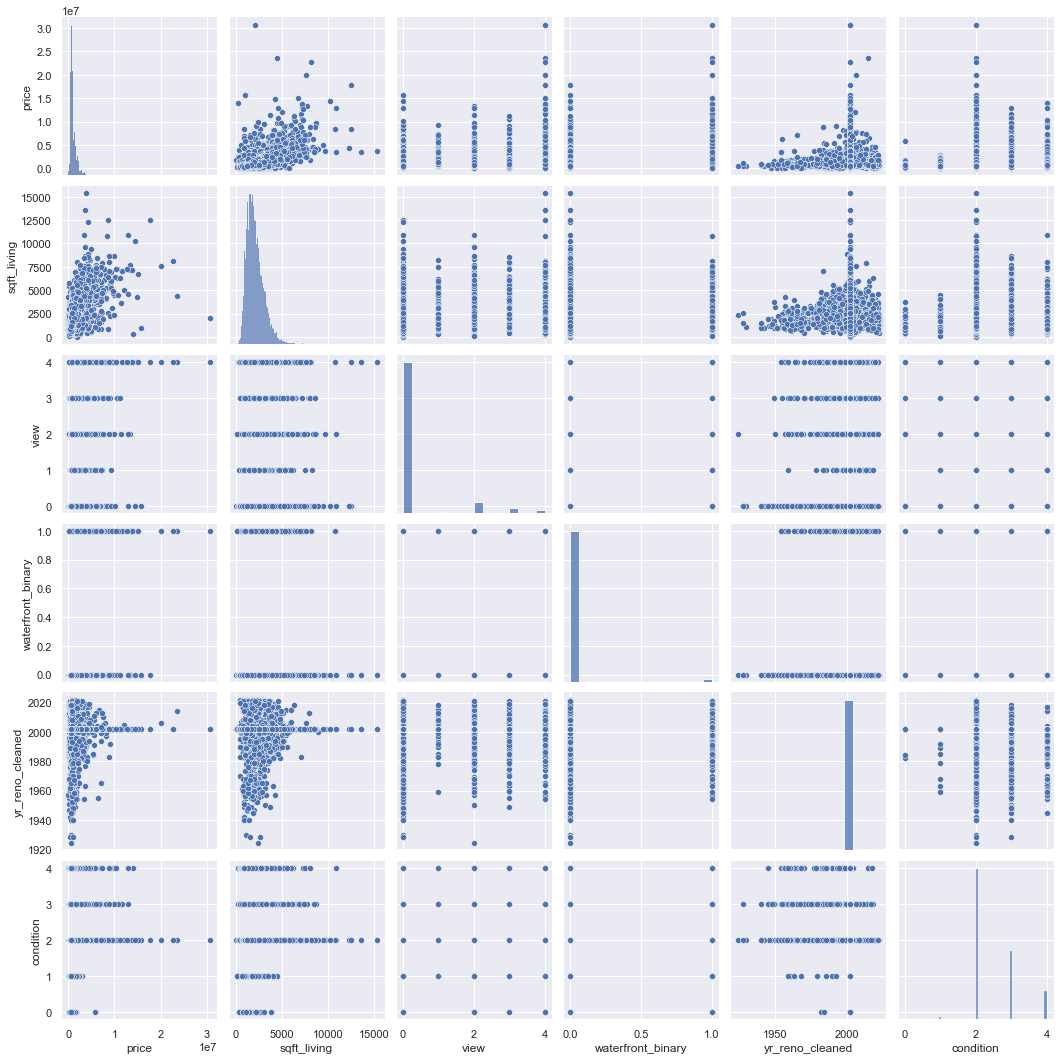

In [73]:
sns.pairplot(X_all)

Let's try just sqft living

In [74]:
X = df[['sqft_living','yr_reno_cleaned']]

X_log = np.log(X)

X_aug = sm.add_constant(X_log)

y = df['price']

y_log = np.log(y)

In [75]:
model_price_sqft_living = sm.OLS(y_log, sm.add_constant(X)).fit()
model_price_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9359.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:38   Log-Likelihood:                -18629.
No. Observations:               29237   AIC:                         3.726e+04
Df Residuals:                   29234   BIC:                         3.729e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.9042      1.354      6.577      0.000       6.251      11.558
sqft_living         0.0004   2.74e-06    136.731      0.000       0.000       0.000
yr_reno_cleaned     0.0020      0.001      2.981      0.003       0.001       0.003
==============================================================================
Omnibus:                     5777.093   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44884.615
Skew:                          -0.741   Prob(JB):                         0.00
Kurtosis:                       8.886   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

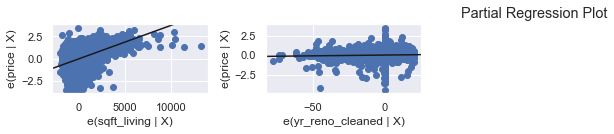

In [76]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    model_price_sqft_living,
    exog_idx=list(X.columns.values),
    grid=(5,5),
    fig=fig)
plt.show()

In [77]:
X = df[['sqft_living','yr_reno_cleaned']]

X_log = np.log(X)

X_aug = sm.add_constant(X_log)

y = df['price']


# Final Regression Eval (prior to predictions)

In [78]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'basement_binary',
 'garage_binary',
 'patio_binary',
 'waterfront_binary',
 'PublicSewer_binary',
 'yrenovated_binary',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98050',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '981

In [79]:
df2 = df.drop(columns=['bedrooms', 'bathrooms', 'waterfront', 'sewer_system', 'address'])

In [80]:
# Create 'total_sqft' by combining sqft_above + sqft_basement + 
# sqft_garage + sqft_patio
df2['total_sqft'] = df2['sqft_above'] + df2['sqft_basement'] + df2['sqft_garage'] + df2['sqft_patio']

In [81]:
df2['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df2['date'].head()

0   2022-05-24
1   2021-12-13
2   2021-09-29
3   2021-12-14
4   2021-08-24
Name: date, dtype: datetime64[ns]

In [82]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,...,98272,98288,98296,98338,98354,98372,98387,98422,98663,yr_reno_cleaned
0,2022-05-24,675000.0,4,1.0,1180,7140,NO,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
1,2021-12-13,920000.0,5,3.0,2770,6703,NO,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
2,2021-09-29,311000.0,6,2.0,2880,6156,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
3,2021-12-14,775000.0,3,3.0,2160,1400,NO,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
4,2021-08-24,592500.0,2,2.0,1120,758,NO,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0


In [83]:
#create sale year column from datetime date info
df2['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)

df2['sale_year'].value_counts()

2021    18680
2022    10557
Name: sale_year, dtype: int64

In [84]:

#create new column - age of house
df2['home_age'] = (df2['sale_year']+1) - df2['yr_built']

#create new column - time since reno
df2['yr_from_reno'] = (df2['sale_year']+1) - df2['yr_renovated']

In [85]:
# create filter for yr_from_reno to ID houses that haven't been renovated
reno_filter = df2['yr_from_reno'] > 2000

# create new column for design_age to see time since build if no reno, or time since reno if renovated
# first set to reno age
df2['design_age'] = df2['yr_from_reno']
#then update columns where there was no reno to age of the home
df2['design_age'].loc[reno_filter] = df2['home_age']

#some houses were sold before they were built - we need to change those records to 0

prebuild_filter = df2['design_age'] < 1

df2['design_age'].loc[prebuild_filter] = 1


/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [86]:
df2.yr_built.value_counts()

2021    1362
1968     516
1978     493
1977     484
1967     474
        ... 
1935      39
1901      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [87]:
df3 = df2.copy()

df3.head()

,date,price,sqft_living,sqft_lot,greenbelt,nuisance,view,condition,sqft_above,sqft_basement,...,98372,98387,98422,98663,yr_reno_cleaned,total_sqft,sale_year,home_age,yr_from_reno,design_age
0,2022-05-24,675000.0,1180,7140,0.0,0.0,0.0,3.0,1180,0,...,0.0,0.0,0.0,0.0,2002.0,1220,2022,54,2023,54
1,2021-12-13,920000.0,2770,6703,0.0,1.0,2.0,2.0,1570,1570,...,0.0,0.0,0.0,0.0,2002.0,3380,2021,72,2022,72
2,2021-09-29,311000.0,2880,6156,0.0,0.0,2.0,2.0,1580,1580,...,0.0,0.0,0.0,0.0,2002.0,3160,2021,66,2022,66
3,2021-12-14,775000.0,2160,1400,0.0,0.0,2.0,2.0,1090,1070,...,0.0,0.0,0.0,0.0,2002.0,2630,2021,12,2022,12
4,2021-08-24,592500.0,1120,758,0.0,1.0,0.0,2.0,1120,550,...,0.0,0.0,0.0,0.0,2002.0,2250,2021,10,2022,10


In [88]:
#Binning by decade

df3['design_decade'] = pd.cut(x=df3['design_age'], bins=[0, 3, 13, 23, 33, 43, 53, 63, 73,
                                                         83, 93, 103, 113, 123],
                    labels=['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s',
                            '1950s', '1940s', '1930s', '1920s', '1910s', '1900s'])

df3.design_decade.value_counts()

2000s    3628
1960s    3525
1980s    3038
1990s    2910
1950s    2836
1970s    2804
2010s    2728
2020s    2290
1940s    2001
1920s    1326
1910s     926
1900s     627
1930s     598
Name: design_decade, dtype: int64

In [89]:
labels_ordered = ['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s','1950s', '1940s', '1930s', '1920s', '1910s', '1900s']

labels_ordered.reverse()

labels_ordered

['1900s',
 '1910s',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s',
 '2010s',
 '2020s']

In [90]:
df3.loc[df3['design_decade'].isna()]

,date,price,sqft_living,sqft_lot,greenbelt,nuisance,view,condition,sqft_above,sqft_basement,...,98387,98422,98663,yr_reno_cleaned,total_sqft,sale_year,home_age,yr_from_reno,design_age,design_decade


In [91]:
# Create Ordinal Values for view
# Using OneHotEncoder
age_cat = df3[['design_decade']]
age_categories = labels_ordered
encoder_age = OrdinalEncoder(categories=[age_categories])
encoder_age.fit(age_cat)
encoder_age.categories_[0]

array(['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'], dtype=object)

In [92]:
age_encoded_train = encoder_age.transform(age_cat)
age_encoded_train = age_encoded_train.flatten()
df3["design_decade"] = age_encoded_train

In [93]:
df3["design_decade"]

0         6.0
1         5.0
2         5.0
3        11.0
4        11.0
         ... 
30150     2.0
30151    11.0
30152     9.0
30153    10.0
30154     6.0
Name: design_decade, Length: 29237, dtype: float64

### Copying Ali's version (updated)

In [94]:
list(df3.columns)

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'basement_binary',
 'garage_binary',
 'patio_binary',
 'waterfront_binary',
 'PublicSewer_binary',
 'yrenovated_binary',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98050',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '9816

In [95]:
# df4 = df3.loc[df3['design_age'] < 2]

In [96]:
# relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
#            '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
#            '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
#            '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
#            '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
#            '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
#            '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
#            '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
#            '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
#            '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
#            '98270', '98271', '98272', '98288', '98296', '98338', '98354', '98372',
#            '98387', '98422', '98663', 'total_sqft', 'design_decade', 'nuisance',
#             'garage_binary', 'basement_binary', 'patio_binary', 'waterfront_binary']

In [97]:
# Ali_X = df4[relevant]

# Aly_y = df4['price']

In [98]:
# model = sm.OLS(Aly_y, sm.add_constant(Ali_X))

# results = model.fit()

# results.summary()

In [99]:
df3['yard_size_ratio'] = (df3['total_sqft'] / df3['sqft_lot']) * 100

In [100]:
list(df3.columns)

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'basement_binary',
 'garage_binary',
 'patio_binary',
 'waterfront_binary',
 'PublicSewer_binary',
 'yrenovated_binary',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98050',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '9816

In [101]:
df3['yard_size_ratio'].head(10)

0     17.086835
1     50.425183
2     51.332034
3    187.857143
4    296.833773
5     26.195499
6      8.087329
7     81.574444
8     35.076923
9     62.980031
Name: yard_size_ratio, dtype: float64

In [102]:
relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
           '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
           '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
           '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
           '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
           '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
           '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
           '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
           '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
           '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
           '98270', '98271', '98272', '98288', '98296', '98338', '98354', '98372',
           '98387', '98422', '98663', 'greenbelt', 'total_sqft', 'design_decade', 'nuisance',
            'garage_binary', 'basement_binary', 'patio_binary', 'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio']

In [103]:
Ali_X = df3[relevant]

Aly_y = df3['price']

In [104]:
model = sm.OLS(Aly_y, sm.add_constant(Ali_X))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     533.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:39   Log-Likelihood:            -4.2705e+05
No. Observations:               29237   AIC:                         8.543e+05
Df Residuals:                   29137   BIC:                         8.551e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.677e+04   2.59e+04      1.805      0.071   -4008.448    9.75e+04
view                 1.09e+05   4358.723     25.013      0.000       1e+05    1.18e+05
condition           5.866e+04   4879.708     12.022      0.000    4.91e+04    6.82e+04
98001              -5.284e+05   2.68e+04    -19.711      0.000   -5.81e+05   -4.76e+05
98002              -4.405e+05   3.22e+04    -13.668      0.000   -5.04e+05   -3.77e+05
98003              -4.924e+05   3.01e+04    -16.381      0.000   -5.51e+05   -4.33e+05
98004               1.883e+06   3.41e+04     55.268      0.000    1.82e+06    1.95e+06
98005               6.385e+05   4.28e+04     14.902      0.000    5.55e+05    7.22e+05
98006               3.253e+05   2.85e+04     11.405      0.000    2.69e+05    3.81e+05
98007               2.684e+05   4.57e+04      5.876      0.000    1.79e+05    3.58e+05
98008               2.943e+05   3.12e+04      9.427      0.000    2.33e+05    3.56e+05
98010              -5.974e+05   3.42e+04    -17.491      0.000   -6.64e+05    -5.3e+05
98011              -5.432e+04   3.66e+04     -1.486      0.137   -1.26e+05    1.73e+04
98014              -3.602e+05   4.54e+04     -7.927      0.000   -4.49e+05   -2.71e+05
98019               -2.75e+05   3.75e+04     -7.333      0.000   -3.48e+05   -2.01e+05
98022              -5.654e+05   2.98e+04    -18.990      0.000   -6.24e+05   -5.07e+05
98023              -5.668e+05   2.59e+04    -21.873      0.000   -6.18e+05   -5.16e+05
98024               2.975e+04   5.29e+04      0.562      0.574   -7.39e+04    1.33e+05
98027              -2.428e+04   3.18e+04     -0.763      0.446   -8.67e+04    3.81e+04
98028              -1.373e+05   3.26e+04     -4.214      0.000   -2.01e+05   -7.35e+04
98029               2.354e+05   3.38e+04      6.967      0.000    1.69e+05    3.02e+05
98030              -5.069e+05   3.18e+04    -15.930      0.000   -5.69e+05   -4.45e+05
98031              -4.781e+05   2.83e+04    -16.918      0.000   -5.33e+05   -4.23e+05
98032              -4.621e+05   4.23e+04    -10.935      0.000   -5.45e+05   -3.79e+05
98033               6.899e+05   2.69e+04     25.628      0.000    6.37e+05    7.43e+05
98034               1.302e+05   2.59e+04      5.026      0.000    7.94e+04    1.81e+05
98038              -4.596e+05   2.45e+04    -18.743      0.000   -5.08e+05   -4.11e+05
98039               3.296e+06    7.1e+04     46.410      0.000    3.16e+06    3.44e+06
98040               9.302e+05   3.31e+04     28.114      0.000    8.65e+05    9.95e+05
98042              -5.165e+05   2.36e+04    -21.881      0.000   -5.63e+05    -4.7e+05
98045              -3.356e+05   2.97e+04    -11.298      0.000   -3.94e+05   -2.77e+05
98047              -4.775e+05   6.22e+04     -7.672      0.000   -5.99e+05   -3.55e+05
98050               3677.9784   3.74e+

In [105]:
df4 = df3.loc[df3['total_sqft'] > 1400]

In [106]:
Ali_X = df4[relevant]

Aly_y = df4['price']

In [107]:
model = sm.OLS(Aly_y, sm.add_constant(Ali_X))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     501.8
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:40   Log-Likelihood:            -3.8619e+05
No. Observations:               26409   AIC:                         7.726e+05
Df Residuals:                   26311   BIC:                         7.734e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.128e+04   2.91e+04     -2.105      0.035   -1.18e+05   -4216.887
view                1.056e+05   4531.818     23.309      0.000    9.67e+04    1.15e+05
condition           6.701e+04   5356.174     12.510      0.000    5.65e+04    7.75e+04
98001              -5.461e+05   2.87e+04    -19.047      0.000   -6.02e+05    -4.9e+05
98002              -4.654e+05   3.64e+04    -12.792      0.000   -5.37e+05   -3.94e+05
98003              -5.161e+05   3.18e+04    -16.211      0.000   -5.78e+05   -4.54e+05
98004               1.897e+06   3.56e+04     53.256      0.000    1.83e+06    1.97e+06
98005               6.259e+05    4.4e+04     14.212      0.000     5.4e+05    7.12e+05
98006               3.125e+05   2.99e+04     10.436      0.000    2.54e+05    3.71e+05
98007               2.737e+05   4.72e+04      5.801      0.000    1.81e+05    3.66e+05
98008               3.001e+05   3.29e+04      9.110      0.000    2.36e+05    3.65e+05
98010              -6.103e+05   3.57e+04    -17.077      0.000    -6.8e+05    -5.4e+05
98011              -5.798e+04   3.81e+04     -1.523      0.128   -1.33e+05    1.66e+04
98014              -3.861e+05   4.95e+04     -7.807      0.000   -4.83e+05   -2.89e+05
98019              -2.949e+05   3.91e+04     -7.549      0.000   -3.71e+05   -2.18e+05
98022              -5.918e+05   3.22e+04    -18.366      0.000   -6.55e+05   -5.29e+05
98023              -5.865e+05   2.76e+04    -21.252      0.000   -6.41e+05   -5.32e+05
98024               4.059e+04   5.57e+04      0.729      0.466   -6.86e+04     1.5e+05
98027              -3.186e+04   3.33e+04     -0.956      0.339   -9.72e+04    3.35e+04
98028              -1.399e+05   3.43e+04     -4.076      0.000   -2.07e+05   -7.26e+04
98029               2.379e+05   3.51e+04      6.777      0.000    1.69e+05    3.07e+05
98030              -5.192e+05   3.36e+04    -15.437      0.000   -5.85e+05   -4.53e+05
98031              -4.821e+05   2.96e+04    -16.279      0.000    -5.4e+05   -4.24e+05
98032              -4.956e+05   4.62e+04    -10.716      0.000   -5.86e+05   -4.05e+05
98033               6.922e+05   2.85e+04     24.327      0.000    6.36e+05    7.48e+05
98034               1.401e+05   2.73e+04      5.138      0.000    8.67e+04    1.94e+05
98038              -4.645e+05   2.58e+04    -17.980      0.000   -5.15e+05   -4.14e+05
98039               3.326e+06   7.49e+04     44.393      0.000    3.18e+06    3.47e+06
98040               8.883e+05   3.44e+04     25.858      0.000    8.21e+05    9.56e+05
98042              -5.273e+05   2.51e+04    -21.003      0.000   -5.76e+05   -4.78e+05
98045               -3.41e+05   3.13e+04    -10.893      0.000   -4.02e+05    -2.8e+05
98047              -4.797e+05   6.56e+04     -7.317      0.000   -6.08e+05   -3.51e+05
98050               1.813e+04   3.81e+

# Attempting Sklearn predictive model with our current regression model

In [108]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

In [109]:
df.drop(['id', 'floors',
         'heat_source','lat','long'], axis=1, inplace=True)

In [110]:
# Create zip from address
df['zip'] = [x.split(',')[2][-5:] for x in df['address']] 

In [111]:
#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df = df[df.zip.str.startswith(('98'))]

In [112]:
df['city'] = [x.split(',')[1][0:] for x in df['address']]

In [113]:
df['city'].value_counts()

 Seattle            9368
 Renton             1946
 Kent               1583
 Auburn             1509
 Bellevue           1484
                    ... 
 Dilworth              1
 Fairwood              1
 Snoqualmie Pass       1
 Dash Point            1
 Ames Lake             1
Name: city, Length: 63, dtype: int64

In [114]:
#create sale year column from datetime date info
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)

df['sale_year'].value_counts()

2021    18680
2022    10557
Name: sale_year, dtype: int64

In [115]:

#create new column - age of house
df['home_age'] = (df['sale_year']+1) - df['yr_built']

#create new column - time since reno
df['yr_from_reno'] = (df['sale_year']+1) - df['yr_renovated']

In [116]:
# create filter for yr_from_reno to ID houses that haven't been renovated
reno_filter = df['yr_from_reno'] > 2000

# create new column for design_age to see time since build if no reno, or time since reno if renovated
# first set to reno age
df['design_age'] = df['yr_from_reno']
#then update columns where there was no reno to age of the home
df['design_age'].loc[reno_filter] = df['home_age']

#some houses were sold before they were built - we need to change those records to 0

prebuild_filter = df['design_age'] < 1

df['design_age'].loc[prebuild_filter] = 1


/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [117]:
y = df["price"]
X = df.drop("price", axis=1)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [119]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 21927 rows and 25 columns
y_train is a Series with 21927 values


In [120]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Building Training Transformations

In [121]:
df.grade.value_counts()

7 Average        11557
8 Good            8871
9 Better          3595
6 Low Average     2854
10 Very Good      1352
11 Excellent       402
5 Fair             392
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [122]:
# Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom). Change 0 bathroom to 1 bathroom. Round up other values.
X_train.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
X_train['bathrooms'] = X_train['bathrooms'].apply(np.ceil)


# Create binary substitutes for columns
X_train['basement_binary'] = [1 if sq >  0  else 0 for sq in X_train['sqft_basement']]
X_train['garage_binary'] = [1 if sq >  0  else 0 for sq in X_train['sqft_garage']]
X_train['patio_binary'] = [1 if sq >  0  else 0 for sq in X_train['sqft_patio']]
X_train['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in X_train['waterfront']]
X_train['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in X_train['sewer_system']]
X_train['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in X_train['yr_renovated']]


# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = X_train[['greenbelt']]
encoder_greenbelt = OrdinalEncoder(categories=[['NO', 'YES']])
encoder_greenbelt.fit(greenbelt_cat)
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
X_train["greenbelt"] = greenbelt_encoded_train

nuisance_cat = X_train[['nuisance']]
encoder_nuisance = OrdinalEncoder()
encoder_nuisance.fit(nuisance_cat)
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
X_train["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = X_train[['condition']]
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
encoder_condition = OrdinalEncoder(categories=[condition_categories])
encoder_condition.fit(condition_cat)
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
X_train["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = X_train[['view']]
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
encoder_view = OrdinalEncoder(categories=[view_categories])
encoder_view.fit(view_cat)
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
X_train["view"] = view_encoded_train


grade_cat = X_train[['grade']]
grade_categories = ['1 Cabin', '2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average',
                    '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
encoder_grade = OrdinalEncoder(categories=[grade_categories])
encoder_grade.fit(grade_cat)
grade_encoded_train = encoder_grade.transform(grade_cat)
grade_encoded_train = grade_encoded_train.flatten()
X_train["grade"] = grade_encoded_train

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
city_train = X_train[["city"]]

ohe = OneHotEncoder(categories="auto",
                    sparse=False,
                    handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(city_train)

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
city_encoded_train = ohe.transform(city_train)

# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
city_encoded_train = ohe.transform(city_train)

# Visually inspect fireplace_qu_encoded_train
city_encoded_train

# (5a) Make the transformed data into a dataframe
city_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    city_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_train.index
)

# Run this cell without changes

# (5b) Drop original FireplaceQu column
X_train.drop("city", axis=1, inplace=True)

# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, city_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = X_train[["zip"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
                    sparse=False,
                    handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(fireplace_qu_train)

# Inspect the categories of the fitted encoder
ohe.categories_

/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-122-b308a9fb69c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bathrooms'] = X_train['bathrooms'].apply(np.ceil)
<ipython-input-122-b308a9fb69c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98047', '98050', '98051', '98052', '98053', '98055', '98056',
        '98057', '98058', '98059', '98065', '98070', '98072', '98074',
        '98075', '98077', '98092', '98102', '98103', '98105', '98106',
        '98107', '98108', '98109', '98112', '98115', '98116', '98117',
        '98118', '98119', '98122', '98125', '98126', '98133', '98136',
        '98144', '98146', '98148', '98155', '98166', '98168', '98177',
        '98178', '98188', '98198', '98199', '98223', '98224', '98251',
        '98271', '98272', '98288', '98296', '98338', '98354', '98372',
        '98387', '98422', '98663'], dtype=object)]

In [123]:
# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# Visually inspect fireplace_qu_encoded_train
fireplace_qu_encoded_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
# Run this cell without changes

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
fireplace_qu_encoded_train

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# Run this cell without changes

# (5b) Drop original FireplaceQu column
X_train.drop("zip", axis=1, inplace=True)

# Visually inspect X_train

In [126]:
# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,condition,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
688,2022-05-19,4,3.0,2180,8100,NO,0.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20703,2022-05-02,3,2.0,1260,6935,NO,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19670,2021-10-11,2,1.0,880,3750,NO,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29170,2021-10-27,3,2.0,1680,10754,NO,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11948,2022-03-24,4,1.0,1470,22995,NO,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Create 'total_sqft' by combining sqft_above + sqft_basement + 
# sqft_garage + sqft_patio
X_train['total_sqft'] = X_train['sqft_above'] + X_train['sqft_basement'] + X_train['sqft_garage'] + X_train['sqft_patio']

X_train['date'] = pd.to_datetime(X_train['date'], format='%Y-%m-%d')

X_train['date'].head()

688     2022-05-19
20703   2022-05-02
19670   2021-10-11
29170   2021-10-27
11948   2022-03-24
Name: date, dtype: datetime64[ns]

In [128]:
#create sale year column from datetime date info
X_train['sale_year'] = pd.DatetimeIndex(X_train['date']).year.astype(int)

X_train['sale_year'].value_counts()

2021    14075
2022     7852
Name: sale_year, dtype: int64

In [129]:
#Binning by decade

X_train['design_decade'] = pd.cut(x=X_train['design_age'], bins=[0, 3, 13, 23, 33, 43, 53, 63, 73,
                                                         83, 93, 103, 113, 123],
                    labels=['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s',
                            '1950s', '1940s', '1930s', '1920s', '1910s', '1900s'])

X_train.design_decade.value_counts()

2000s    2729
1960s    2656
1980s    2260
1990s    2202
1950s    2115
1970s    2090
2010s    2020
2020s    1729
1940s    1537
1920s    1004
1910s     676
1930s     461
1900s     448
Name: design_decade, dtype: int64

In [130]:
labels_ordered = ['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s','1950s', '1940s', '1930s', '1920s', '1910s', '1900s']

labels_ordered.reverse()

labels_ordered

['1900s',
 '1910s',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s',
 '2010s',
 '2020s']

In [131]:
X_train.loc[df3['design_decade'].isna()]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,condition,...,98288,98296,98338,98354,98372,98387,98422,98663,total_sqft,design_decade


In [132]:
# Create Ordinal Values for view
# Using OneHotEncoder
age_cat = X_train[['design_decade']]
age_categories = labels_ordered
encoder_age = OrdinalEncoder(categories=[age_categories])
encoder_age.fit(age_cat)
encoder_age.categories_[0]

array(['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'], dtype=object)

In [133]:
age_encoded_train = encoder_age.transform(age_cat)
age_encoded_train = age_encoded_train.flatten()
X_train["design_decade"] = age_encoded_train

In [134]:
X_train["design_decade"]

688       7.0
20703     5.0
19670     0.0
29170     7.0
11948     0.0
         ... 
27747     2.0
8208     12.0
19264     6.0
20392     1.0
14575     9.0
Name: design_decade, Length: 21927, dtype: float64

In [135]:
X_train['yard_size_ratio'] = (X_train['total_sqft'] / X_train['sqft_lot']) * 100

In [136]:
list(X_train.columns)

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'sale_year',
 'home_age',
 'yr_from_reno',
 'design_age',
 'basement_binary',
 'garage_binary',
 'patio_binary',
 'waterfront_binary',
 'PublicSewer_binary',
 'yrenovated_binary',
 ' Algona',
 ' Ames Lake',
 ' Arlington',
 ' Auburn',
 ' Baring',
 ' Beaux Arts',
 ' Bellevue',
 ' Black Diamond',
 ' Bothell',
 ' Burien',
 ' Carnation',
 ' Clyde Hill',
 ' Cottage Lake',
 ' Covington',
 ' Dash Point',
 ' Des Moines',
 ' Dilworth',
 ' Duvall',
 ' Eatonville',
 ' Enumclaw',
 ' Fairwood',
 ' Fall City',
 ' Federal Way',
 ' Hobart',
 ' Hunts Point',
 ' Issaquah',
 ' Kenmore',
 ' Kent',
 ' Kirkland',
 ' Lake Forest Park',
 ' Lakeland North',
 ' Maple Valley',
 ' Marysville',
 ' Medina',
 ' Mercer Island',
 ' Milton',
 ' Monroe',
 ' Newc

### Testing Cities

In [137]:
relevant = ['view', 'condition', ' Algona', ' Ames Lake', ' Arlington', ' Auburn', ' Baring', ' Beaux Arts',
            ' Bellevue', ' Black Diamond', ' Bothell', ' Burien', ' Carnation', ' Clyde Hill', ' Cottage Lake',
            ' Covington', ' Dash Point', ' Des Moines', ' Dilworth', ' Duvall', ' Eatonville', ' Enumclaw', ' Fairwood',
            ' Fall City', ' Federal Way', ' Hobart', ' Hunts Point', ' Issaquah', ' Kenmore', ' Kent', ' Kirkland',
            ' Lake Forest Park', ' Lakeland North', ' Maple Valley', ' Marysville', ' Medina', ' Mercer Island', ' Milton',
            ' Monroe', ' Newcastle', ' Normandy Park', ' North Bend', ' Pacific', ' Preston', ' Puyallup', ' Ravensdale',
            ' Redmond', ' Renton', ' Sammamish', ' SeaTac', ' Seattle', ' Shoreline', ' Skykomish', ' Snohomish', ' Snoqualmie',
            ' Snoqualmie Pass', ' Spanaway', ' Tukwila', ' Tulalip', ' Vancouver', ' Vashon', ' Woodinville', ' Yarrow Point',
            'greenbelt', 'total_sqft', 'design_decade', 'nuisance','garage_binary', 'basement_binary', 'patio_binary',
            'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio','grade']

X_train = X_train[relevant]

In [138]:
model_1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results = model_1.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     516.3
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:42:41   Log-Likelihood:            -3.2094e+05
No. Observations:               21927   AIC:                         6.420e+05
Df Residuals:                   21853   BIC:                         6.426e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.188e+05   4.83e+04    -10.731      0.000   -6.14e+05   -4.24e+05
view                9.267e+04   5139.924     18.029      0.000    8.26e+04    1.03e+05
condition           4.833e+04   5791.933      8.345      0.000     3.7e+04    5.97e+04
 Algona            -4.482e+05   9.26e+04     -4.840      0.000    -6.3e+05   -2.67e+05
 Ames Lake         -5.094e+05   5.43e+05     -0.937      0.349   -1.57e+06    5.56e+05
 Arlington          2.847e+05   3.15e+05      0.904      0.366   -3.33e+05    9.02e+05
 Auburn            -6.099e+05    3.8e+04    -16.042      0.000   -6.84e+05   -5.35e+05
 Baring            -2.874e+05   2.45e+05     -1.172      0.241   -7.68e+05    1.93e+05
 Beaux Arts         8.743e+05   1.75e+05      4.996      0.000    5.31e+05    1.22e+06
 Bellevue            3.33e+05   3.84e+04      8.678      0.000    2.58e+05    4.08e+05
 Black Diamond     -6.728e+05   5.16e+04    -13.027      0.000   -7.74e+05   -5.72e+05
 Bothell           -1.783e+05   5.18e+04     -3.444      0.001    -2.8e+05   -7.68e+04
 Burien            -3.898e+05   4.29e+04     -9.083      0.000   -4.74e+05   -3.06e+05
 Carnation          -4.06e+05   6.32e+04     -6.422      0.000    -5.3e+05   -2.82e+05
 Clyde Hill         2.335e+06   8.47e+04     27.565      0.000    2.17e+06     2.5e+06
 Cottage Lake       1.732e+05   5.43e+05      0.319      0.750   -8.92e+05    1.24e+06
 Covington         -5.099e+05   4.46e+04    -11.434      0.000   -5.97e+05   -4.22e+05
 Dash Point        -1.279e+06   5.43e+05     -2.354      0.019   -2.34e+06   -2.14e+05
 Des Moines        -5.384e+05   4.59e+04    -11.727      0.000   -6.28e+05   -4.48e+05
 Dilworth          -1.162e+06   5.44e+05     -2.137      0.033   -2.23e+06   -9.62e+04
 Duvall            -3.542e+05   5.23e+04     -6.768      0.000   -4.57e+05   -2.52e+05
 Eatonville         7.918e+04   3.87e+05      0.205      0.838   -6.79e+05    8.37e+05
 Enumclaw          -6.048e+05   4.58e+04    -13.211      0.000   -6.95e+05   -5.15e+05
 Fairwood          -3.209e+05   5.43e+05     -0.591      0.555   -1.39e+06    7.44e+05
 Fall City           8.32e+04   6.96e+04      1.196      0.232   -5.32e+04     2.2e+05
 Federal Way       -6.484e+05    3.9e+04    -16.626      0.000   -7.25e+05   -5.72e+05
 Hobart            -4.057e+05   3.15e+05     -1.287      0.198   -1.02e+06    2.12e+05
 Hunts Point        6.951e+06   2.25e+05     30.893      0.000    6.51e+06    7.39e+06
 Issaquah          -8.365e+04   4.35e+04     -1.924      0.054   -1.69e+05    1577.319
 Kenmore           -2.536e+05   4.75e+04     -5.341      0.000   -3.47e+05   -1.61e+05
 Kent              -5.793e+05   3.79e+04    -15.298      0.000   -6.54e+05   -5.05e+05
 Kirkland           2.769e+05   3.86e+04      7.168      0.000    2.01e+05    3.53e+05
 Lake Forest Park  -2.793e+05    5.5e+

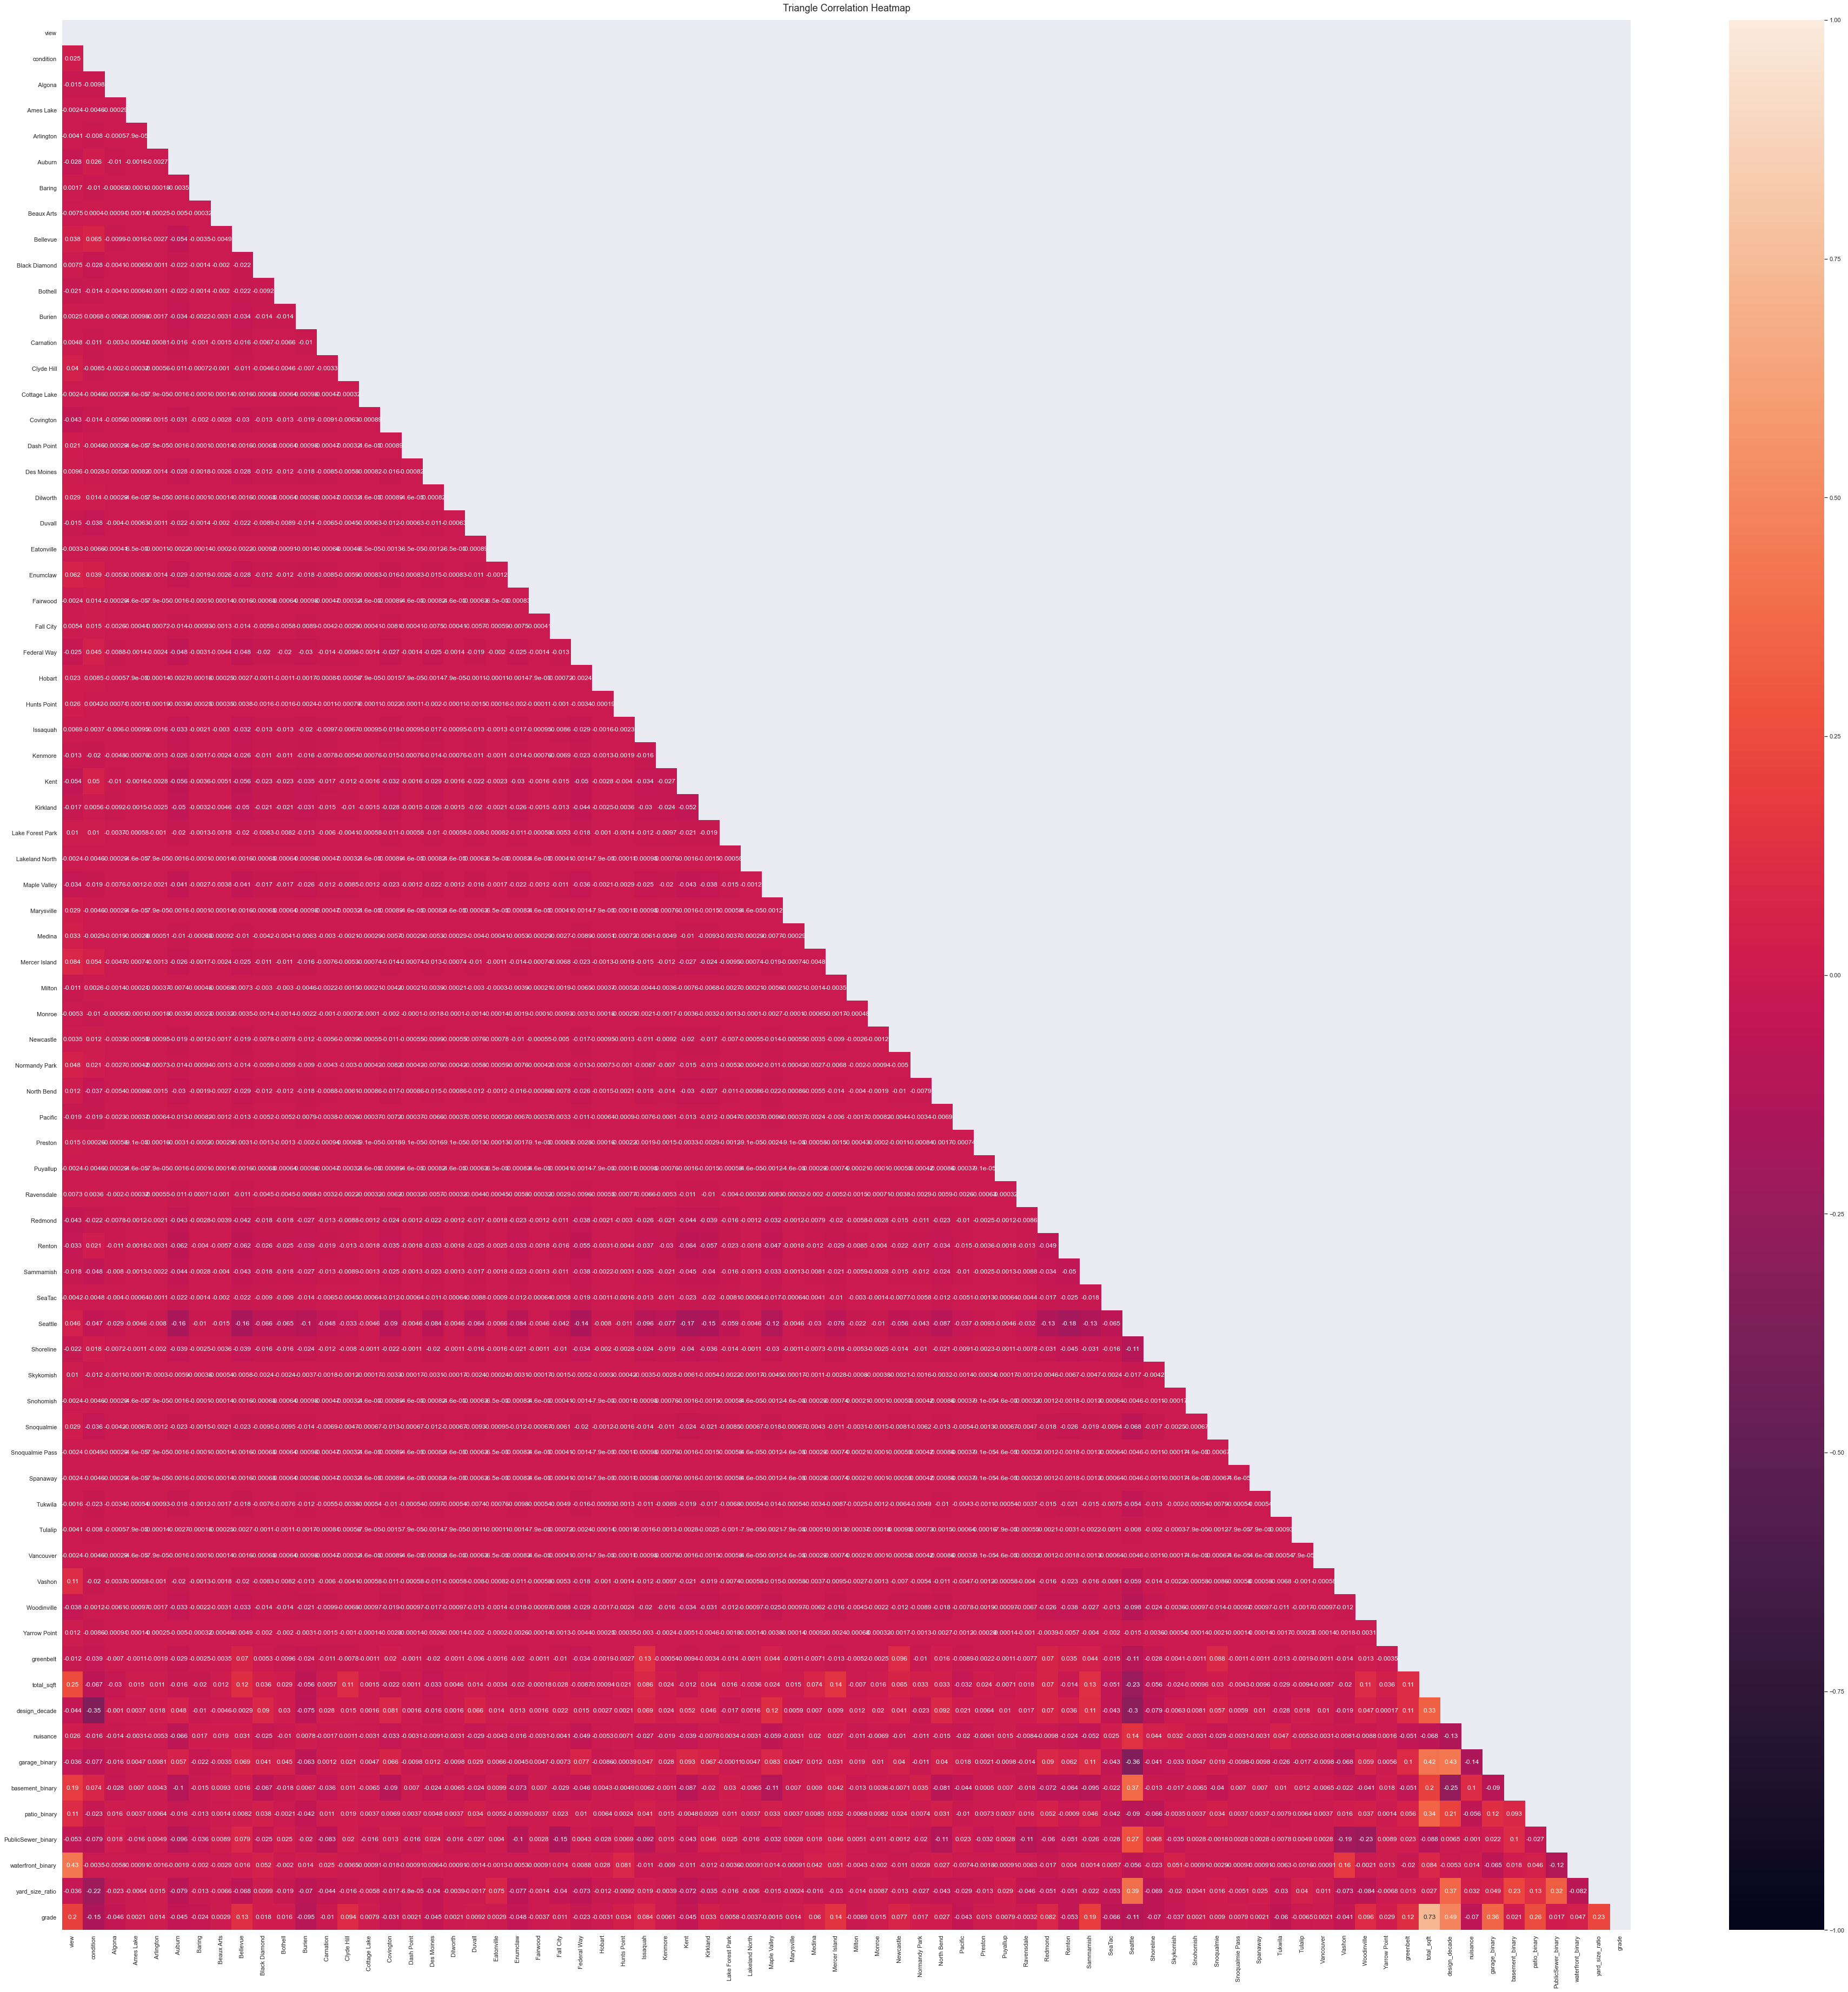

In [139]:
plt.figure(figsize=(65, 65))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))
heatmap = sns.heatmap(X_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Testing Cities

In [140]:
X_train['yard_size_ratio'].head(10)

relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
           '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
           '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
           '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
           '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
           '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
           '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
           '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
           '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
           '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
           '98271', '98272', '98288', '98338', '98354', '98372',
           '98387', '98422', '98663', 'greenbelt', 'total_sqft', 'design_decade', 'nuisance',
            'garage_binary', 'basement_binary', 'patio_binary', 'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio','grade']

X_train = X_train[relevant]

KeyError: "['98034', '98028', '98116', '98075', '98103', '98102', '98022', '98050', '98042', '98122', '98136', '98118', '98148', '98065', '98115', '98198', '98106', '98055', '98177', '98059', '98109', '98663', '98354', '98126', '98199', '98223', '98047', '98002', '98003', '98030', '98072', '98027', '98029', '98039', '98112', '98224', '98178', '98019', '98007', '98251', '98001', '98038', '98146', '98155', '98077', '98031', '98168', '98271', '98108', '98272', '98005', '98011', '98119', '98105', '98125', '98014', '98052', '98056', '98074', '98387', '98422', '98188', '98008', '98092', '98024', '98107', '98058', '98033', '98051', '98372', '98040', '98045', '98133', '98057', '98032', '98053', '98117', '98166', '98010', '98070', '98023', '98006', '98338', '98144', '98288', '98004'] not in index"

## REMOVED 2 ZIP CODES CAUSE THEY'RE ANNOYING - BELOW

In [ ]:
['98296', '98270']

## Applying training transforms on test X

In [ ]:
X_test.shape

In [ ]:
# Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom). Change 0 bathroom to 1 bathroom. Round up other values.
X_test.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
X_test['bathrooms'] = X_test['bathrooms'].apply(np.ceil)

# Create binary substitutes for columns
X_test['basement_binary'] = [1 if sq >  0  else 0 for sq in X_test['sqft_basement']]
X_test['garage_binary'] = [1 if sq >  0  else 0 for sq in X_test['sqft_garage']]
X_test['patio_binary'] = [1 if sq >  0  else 0 for sq in X_test['sqft_patio']]
X_test['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in X_test['waterfront']]
X_test['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in X_test['sewer_system']]
X_test['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in X_test['yr_renovated']]

# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = X_test[['greenbelt']]
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
X_test["greenbelt"] = greenbelt_encoded_train

nuisance_cat = X_test[['nuisance']]
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
X_test["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = X_test[['condition']]
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
X_test["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = X_test[['view']]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
X_test["view"] = view_encoded_train

# Create Ordinal Values for grade
# Using OneHotEncoder
grade_cat = X_test[['grade']]
grade_encoded_train = encoder_grade.transform(grade_cat)
grade_encoded_train = grade_encoded_train.flatten()
X_test["grade"] = grade_encoded_train


# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
city_train = X_test[["city"]]

ohe = OneHotEncoder(categories="auto",
                    sparse=False,
                    handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(city_train)

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
city_encoded_train = ohe.transform(city_train)

# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
city_encoded_train = ohe.transform(city_train)

# Visually inspect fireplace_qu_encoded_train
city_encoded_train

# (5a) Make the transformed data into a dataframe
city_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    city_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index
)

# Run this cell without changes

# (5b) Drop original FireplaceQu column
X_test.drop("city", axis=1, inplace=True)

# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_test
X_test = pd.concat([X_test, city_encoded_train], axis=1)

# Visually inspect X_test
X_test.head()

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = X_test[["zip"]]

fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index
)

# Run this cell without changes

# (5b) Drop original FireplaceQu column
X_test.drop("zip", axis=1, inplace=True)

# Visually inspect X_test

# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_test
X_test = pd.concat([X_test, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_test
X_test.head()

# Create 'total_sqft' by combining sqft_above + sqft_basement + 
# sqft_garage + sqft_patio
X_test['total_sqft'] = X_test['sqft_above'] + X_test['sqft_basement'] + X_test['sqft_garage'] + X_test['sqft_patio']

X_test['date'] = pd.to_datetime(X_test['date'], format='%Y-%m-%d')

X_test['date'].head()

#create sale year column from datetime date info
X_test['sale_year'] = pd.DatetimeIndex(X_test['date']).year.astype(int)

X_test['sale_year'].value_counts()

#Binning by decade

X_test['design_decade'] = pd.cut(x=X_test['design_age'], bins=[0, 3, 13, 23, 33, 43, 53, 63, 73,
                                                         83, 93, 103, 113, 123],
                    labels=['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s',
                            '1950s', '1940s', '1930s', '1920s', '1910s', '1900s'])

X_test.loc[df3['design_decade'].isna()]

# Create Ordinal Values for view
# Using OneHotEncoder
age_cat = X_test[['design_decade']]

age_encoded_train = encoder_age.transform(age_cat)
age_encoded_train = age_encoded_train.flatten()
X_test["design_decade"] = age_encoded_train

X_test['yard_size_ratio'] = (X_test['total_sqft'] / X_test['sqft_lot']) * 100

relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
           '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
           '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
           '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
           '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
           '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
           '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
           '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
           '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
           '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
           '98271', '98272', '98288', '98338', '98354', '98372',
           '98387', '98422', '98663', 'greenbelt', 'total_sqft', 'design_decade', 'nuisance',
            'garage_binary', 'basement_binary', 'patio_binary', 'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio', 'grade']

X_test = X_test[relevant]

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Attempting prediction to see % error

In [ ]:
test = df[:1]

test

In [ ]:
test.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
test['bathrooms'] = test['bathrooms'].apply(np.ceil)

# Create binary substitutes for columns
test['basement_binary'] = [1 if sq >  0  else 0 for sq in test['sqft_basement']]
test['garage_binary'] = [1 if sq >  0  else 0 for sq in test['sqft_garage']]
test['patio_binary'] = [1 if sq >  0  else 0 for sq in test['sqft_patio']]
test['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in test['waterfront']]
test['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in test['sewer_system']]
test['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in test['yr_renovated']]

# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = test[['greenbelt']]
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
test["greenbelt"] = greenbelt_encoded_train

nuisance_cat = test[['nuisance']]
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
test["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = test[['condition']]
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
test["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = test[['view']]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
test["view"] = view_encoded_train


grade_cat = test[['grade']]
grade_encoded_train = encoder_grade.transform(grade_cat)
grade_encoded_train = grade_encoded_train.flatten()
test["grade"] = grade_encoded_train

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = test[["zip"]]

fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match test's index
    index=test.index
)

# Run this cell without changes

# (5b) Drop original FireplaceQu column
test.drop("zip", axis=1, inplace=True)

# Visually inspect test

# Run this cell without changes

# (5c) Concatenate the new dataframe with current test
test = pd.concat([test, fireplace_qu_encoded_train], axis=1)

# Visually inspect test
test.head()

# Create 'total_sqft' by combining sqft_above + sqft_basement + 
# sqft_garage + sqft_patio
test['total_sqft'] = test['sqft_above'] + test['sqft_basement'] + test['sqft_garage'] + test['sqft_patio']

test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

test['date'].head()

#create sale year column from datetime date info
test['sale_year'] = pd.DatetimeIndex(test['date']).year.astype(int)

test['sale_year'].value_counts()

#Binning by decade

test['design_decade'] = pd.cut(x=test['design_age'], bins=[0, 3, 13, 23, 33, 43, 53, 63, 73,
                                                         83, 93, 103, 113, 123],
                    labels=['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s',
                            '1950s', '1940s', '1930s', '1920s', '1910s', '1900s'])

test.loc[df3['design_decade'].isna()]

# Create Ordinal Values for view
# Using OneHotEncoder
age_cat = test[['design_decade']]

age_encoded_train = encoder_age.transform(age_cat)
age_encoded_train = age_encoded_train.flatten()
test["design_decade"] = age_encoded_train

test['yard_size_ratio'] = (test['total_sqft'] / test['sqft_lot']) * 100

relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
           '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
           '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
           '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
           '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
           '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
           '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
           '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
           '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
           '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
           '98271', '98272', '98288', '98338', '98354', '98372',
           '98387', '98422', '98663', 'greenbelt', 'total_sqft', 'design_decade', 'nuisance',
            'garage_binary', 'basement_binary', 'patio_binary', 'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio', 'grade']

test = test[relevant]

In [ ]:
test

In [ ]:
test_dict = test.to_dict()

In [ ]:
test_dict

In [ ]:
for record in test_dict:
    test_dict[record] = test_dict[record][0]
    
test_dict

In [ ]:
X_train.columns

In [ ]:
prediction_dict = test_dict

X_prediction = pd.Series(prediction_dict)
X_prediction

# Let's put this into the model and get our prediction. For a single example need to:
# - convert to numpy array
# - do a reshape to get into form scikit learn likes.

X_pred_np = X_prediction.values
X_pred_np

# predict() needs to take a 2D array
X_pred_input = X_pred_np.reshape(1,-1)
X_pred_input


In [ ]:
# The model predicts a life expectancy for Zamunda of:

price = model.predict(X_pred_input)

price

In [ ]:
expected_price = price

actual_price = 675000.0

In [ ]:
perc_error = np.abs(actual_price - expected_price) / actual_price

perc_error

In [ ]:
error0_post_grade = 0.34302122
error0 = 0.43951844
price0 = 378325.05446793
price0_post_grade = 443460.67450309
actual0 = 675000.0

error1 = 0.40920468
price1 = 1296468.30889078
actual1 = 920000.0

In [ ]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

df.drop(['id', 'floors',
         'heat_source','lat','long'], axis=1, inplace=True)

# Create zip from address
df['zip'] = [x.split(',')[2][-5:] for x in df['address']] 

#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df = df[df.zip.str.startswith(('98'))]

#create sale year column from datetime date info
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)

df['sale_year'].value_counts()


#create new column - age of house
df['home_age'] = (df['sale_year']+1) - df['yr_built']

#create new column - time since reno
df['yr_from_reno'] = (df['sale_year']+1) - df['yr_renovated']

# create filter for yr_from_reno to ID houses that haven't been renovated
reno_filter = df['yr_from_reno'] > 2000

# create new column for design_age to see time since build if no reno, or time since reno if renovated
# first set to reno age
df['design_age'] = df['yr_from_reno']
#then update columns where there was no reno to age of the home
df['design_age'].loc[reno_filter] = df['home_age']

#some houses were sold before they were built - we need to change those records to 0

prebuild_filter = df['design_age'] < 1

df['design_age'].loc[prebuild_filter] = 1


df.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
df['bathrooms'] = df['bathrooms'].apply(np.ceil)

# Create binary substitutes for columns
df['basement_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_basement']]
df['garage_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]
df['patio_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]
df['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in df['waterfront']]
df['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in df['sewer_system']]
df['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in df['yr_renovated']]

# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = df[['greenbelt']]
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
df["greenbelt"] = greenbelt_encoded_train

nuisance_cat = df[['nuisance']]
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
df["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = df[['condition']]
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
df["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = df[['view']]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
df["view"] = view_encoded_train


grade_cat = df[['grade']]
grade_encoded_train = encoder_grade.transform(grade_cat)
grade_encoded_train = grade_encoded_train.flatten()
df["grade"] = grade_encoded_train

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = df[["zip"]]

fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match df's index
    index=df.index
)

# Run this cell without changes

# (5b) Drop original FireplaceQu column
df.drop("zip", axis=1, inplace=True)

# Visually inspect df

# Run this cell without changes

# (5c) Concatenate the new dataframe with current df
df = pd.concat([df, fireplace_qu_encoded_train], axis=1)

# Visually inspect df
df.head()

# Create 'total_sqft' by combining sqft_above + sqft_basement + 
# sqft_garage + sqft_patio
df['total_sqft'] = df['sqft_above'] + df['sqft_basement'] + df['sqft_garage'] + df['sqft_patio']

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['date'].head()

#create sale year column from datetime date info
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)

df['sale_year'].value_counts()

#Binning by decade

df['design_decade'] = pd.cut(x=df['design_age'], bins=[0, 3, 13, 23, 33, 43, 53, 63, 73,
                                                         83, 93, 103, 113, 123],
                    labels=['2020s', '2010s', '2000s', '1990s', '1980s', '1970s', '1960s',
                            '1950s', '1940s', '1930s', '1920s', '1910s', '1900s'])

df.loc[df3['design_decade'].isna()]

# Create Ordinal Values for view
# Using OneHotEncoder
age_cat = df[['design_decade']]

age_encoded_train = encoder_age.transform(age_cat)
age_encoded_train = age_encoded_train.flatten()
df["design_decade"] = age_encoded_train

df['yard_size_ratio'] = (df['total_sqft'] / df['sqft_lot']) * 100

relevant = ['view', 'condition', '98001', '98002', '98003', '98004', '98005',
           '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
           '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
           '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047',
           '98050', '98051', '98052', '98053', '98055', '98056', '98057', '98058',
           '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
           '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112',
           '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126',
           '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168',
           '98177', '98178', '98188', '98198', '98199', '98223', '98224', '98251',
           '98271', '98272', '98288', '98338', '98354', '98372',
           '98387', '98422', '98663', 'greenbelt', 'total_sqft', 'design_decade', 'nuisance',
            'garage_binary', 'basement_binary', 'patio_binary', 'PublicSewer_binary', 'waterfront_binary', 'yard_size_ratio', 'grade']

df_pref = df[relevant]

In [ ]:
X = df_pref
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
results = model.summary()
results